# EDA 

### This is a weekly summary of the daily weather measurments.  
The 'num_patients' is the outcome variable, which describes the amount of people the got infected 3 weeks following the weekly measurments of each row (i.e. patient data and weather data were joined using the cummulative week (cum_week1) of the weather table and the outcome_week of the patient table, which is in fact cum_week-3. 	

In [4]:
data <- read.csv('C:/Users/galie/DataScience/project/flat_file3.csv') ## reading the flat file 
head (data)

,cum_week1,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_max_tm,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,avg_max_blast_w,max_blast_w,avg_wind_speed,wk_avg_precipitation,num_patients,cum_week,male_perc,year,month,outcome_week
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,943.7298,18.03250,30.78000,35.7,24.19155,15.8,19.00000,71.23571,25,8.674286,13.3,1.775595,3.222857,64,4,48,2013,1,1
2,2,941.4388,18.37952,28.67143,36.7,22.99917,15.8,19.44286,77.61310,29,10.002857,19.3,1.926786,9.600000,112,5,38,2013,1,2
3,3,940.8427,19.05929,28.75714,33.5,22.61821,16.8,19.40000,81.73571,41,9.631429,21.3,1.798095,6.800000,137,6,51,2013,2,3
4,4,941.9092,18.53536,27.72571,33.7,22.11857,15.8,18.64286,81.43690,45,9.225714,15.4,1.783333,6.314286,254,7,43,2013,2,4
5,5,943.2068,19.78702,26.15143,32.8,21.84917,16.3,19.73714,88.72024,49,7.625714,14.7,1.404048,12.982857,375,8,42,2013,2,5
6,6,942.4817,18.84524,28.51714,35.5,22.67262,16.6,18.94857,80.74881,35,8.388571,13.2,1.613333,9.354286,641,9,42,2013,2,6


In [5]:
library(DBI)
library(dplyr)
library(ggplot2)

In [6]:
summary(data)

   cum_week1         wk_atm_p        wk_dew_p      wk_avg_max_tmp 
 Min.   :  1.00   Min.   :923.6   Min.   : 9.826   Min.   :21.14  
 1st Qu.: 78.25   1st Qu.:942.6   1st Qu.:14.206   1st Qu.:25.15  
 Median :155.50   Median :944.5   Median :16.537   Median :27.29  
 Mean   :155.50   Mean   :945.0   Mean   :16.230   Mean   :27.41  
 3rd Qu.:232.75   3rd Qu.:947.7   3rd Qu.:18.345   3rd Qu.:29.54  
 Max.   :310.00   Max.   :959.8   Max.   :20.966   Max.   :34.28  
   wk_max_tm       wk_avg_tm       wk_min_tm     wk_avg_min_tmp  
 Min.   :26.30   Min.   :14.31   Min.   : 4.30   Min.   : 8.989  
 1st Qu.:31.90   1st Qu.:18.73   1st Qu.: 9.30   1st Qu.:14.374  
 Median :33.75   Median :21.32   Median :12.90   Median :17.271  
 Mean   :33.70   Mean   :21.00   Mean   :12.49   Mean   :16.706  
 3rd Qu.:35.80   3rd Qu.:23.17   3rd Qu.:15.50   3rd Qu.:19.005  
 Max.   :40.70   Max.   :25.65   Max.   :18.80   Max.   :21.269  
   wk_avg_hum      wk_min_hum    avg_max_blast_w   max_blast_w   
 Mi

In [8]:
library(tidyverse)  
library(DataExplorer)

## Checking for missing values

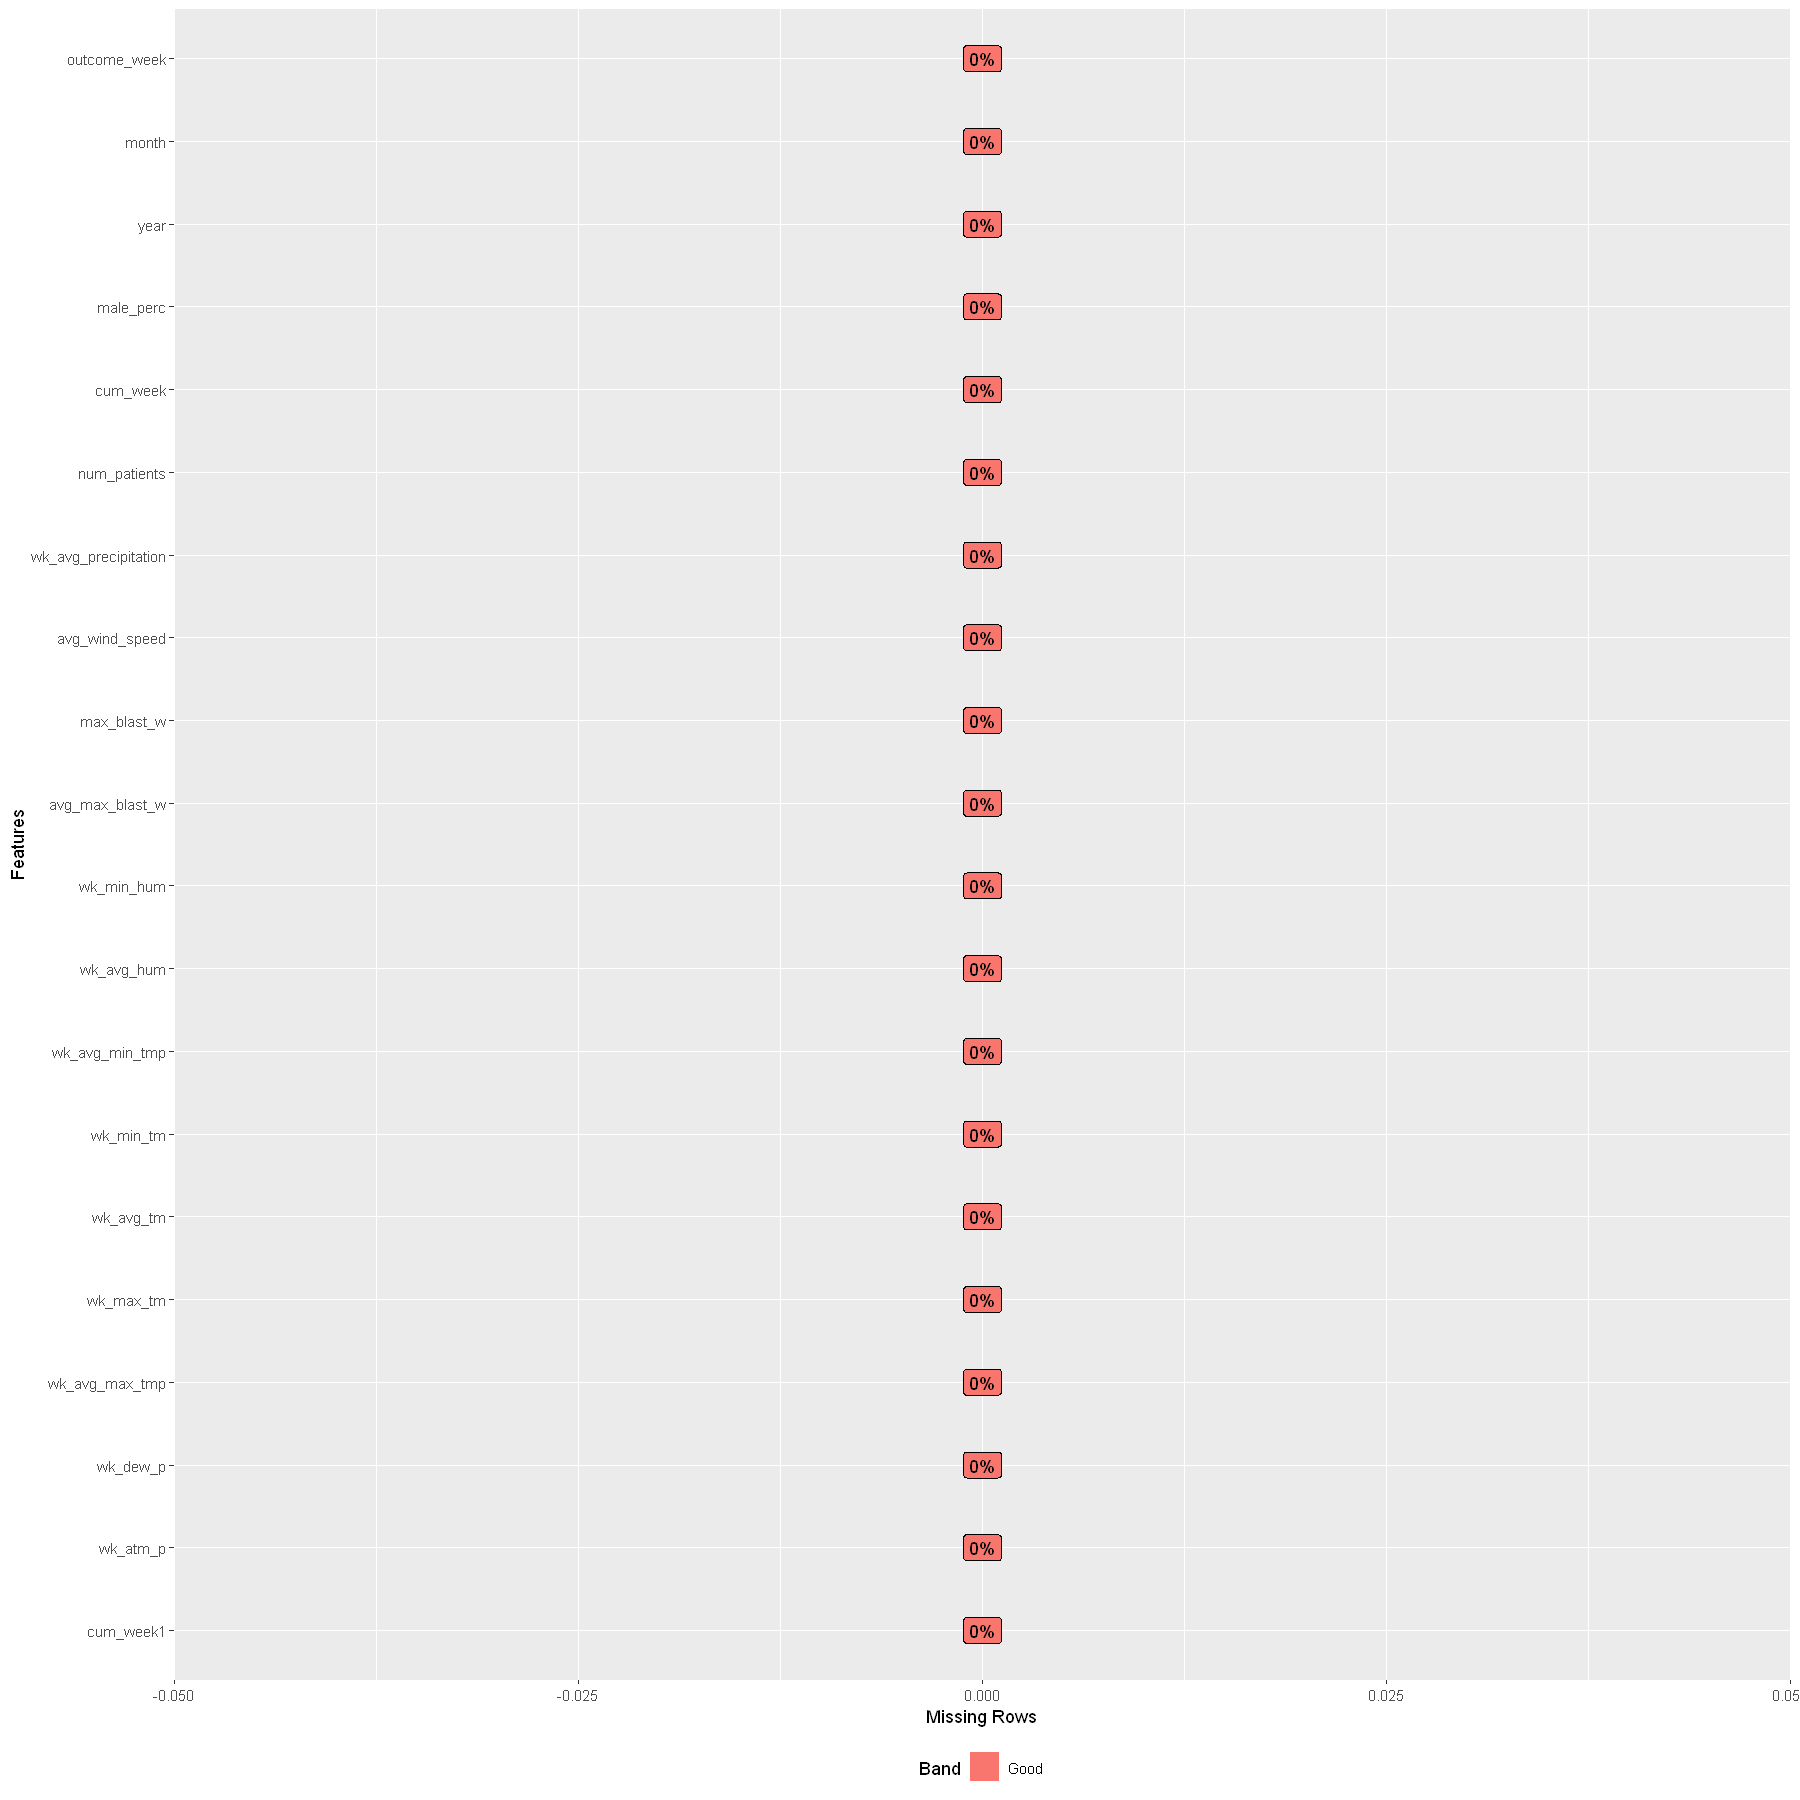

In [58]:
plot_missing(data)

### There are no missing values, probably since the data was aggragated to weekly stats, instead of daily values. Additionaly, the available timelines were allinged using SQL (see methods section).  

## Variable Distributions

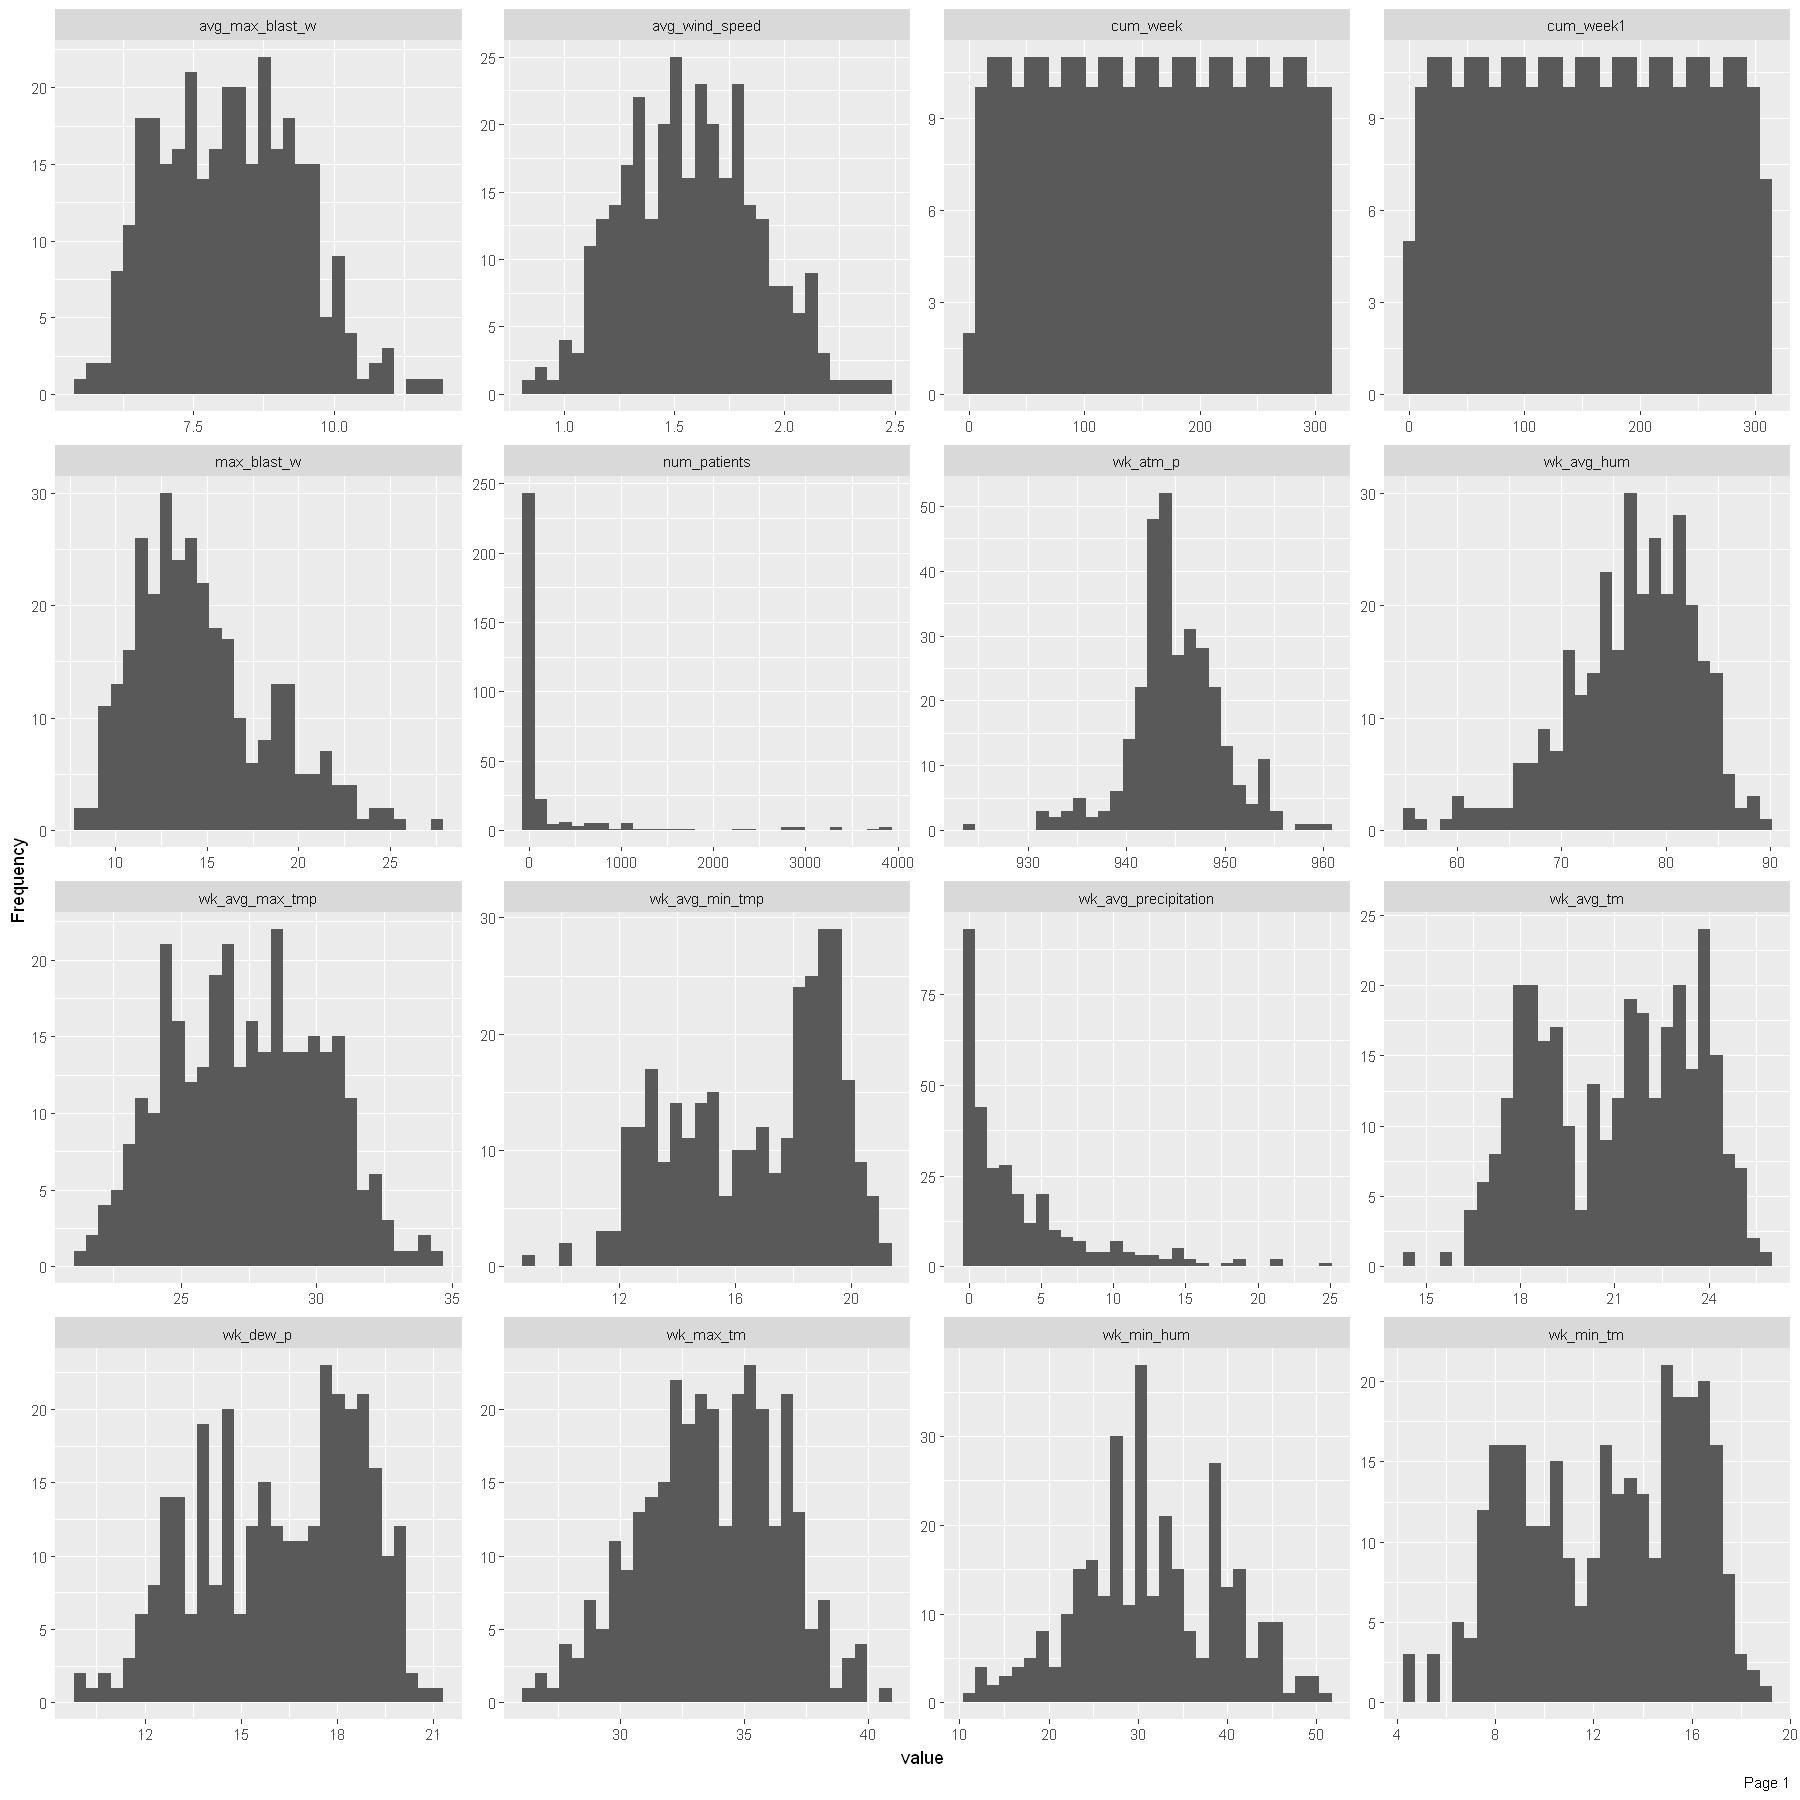

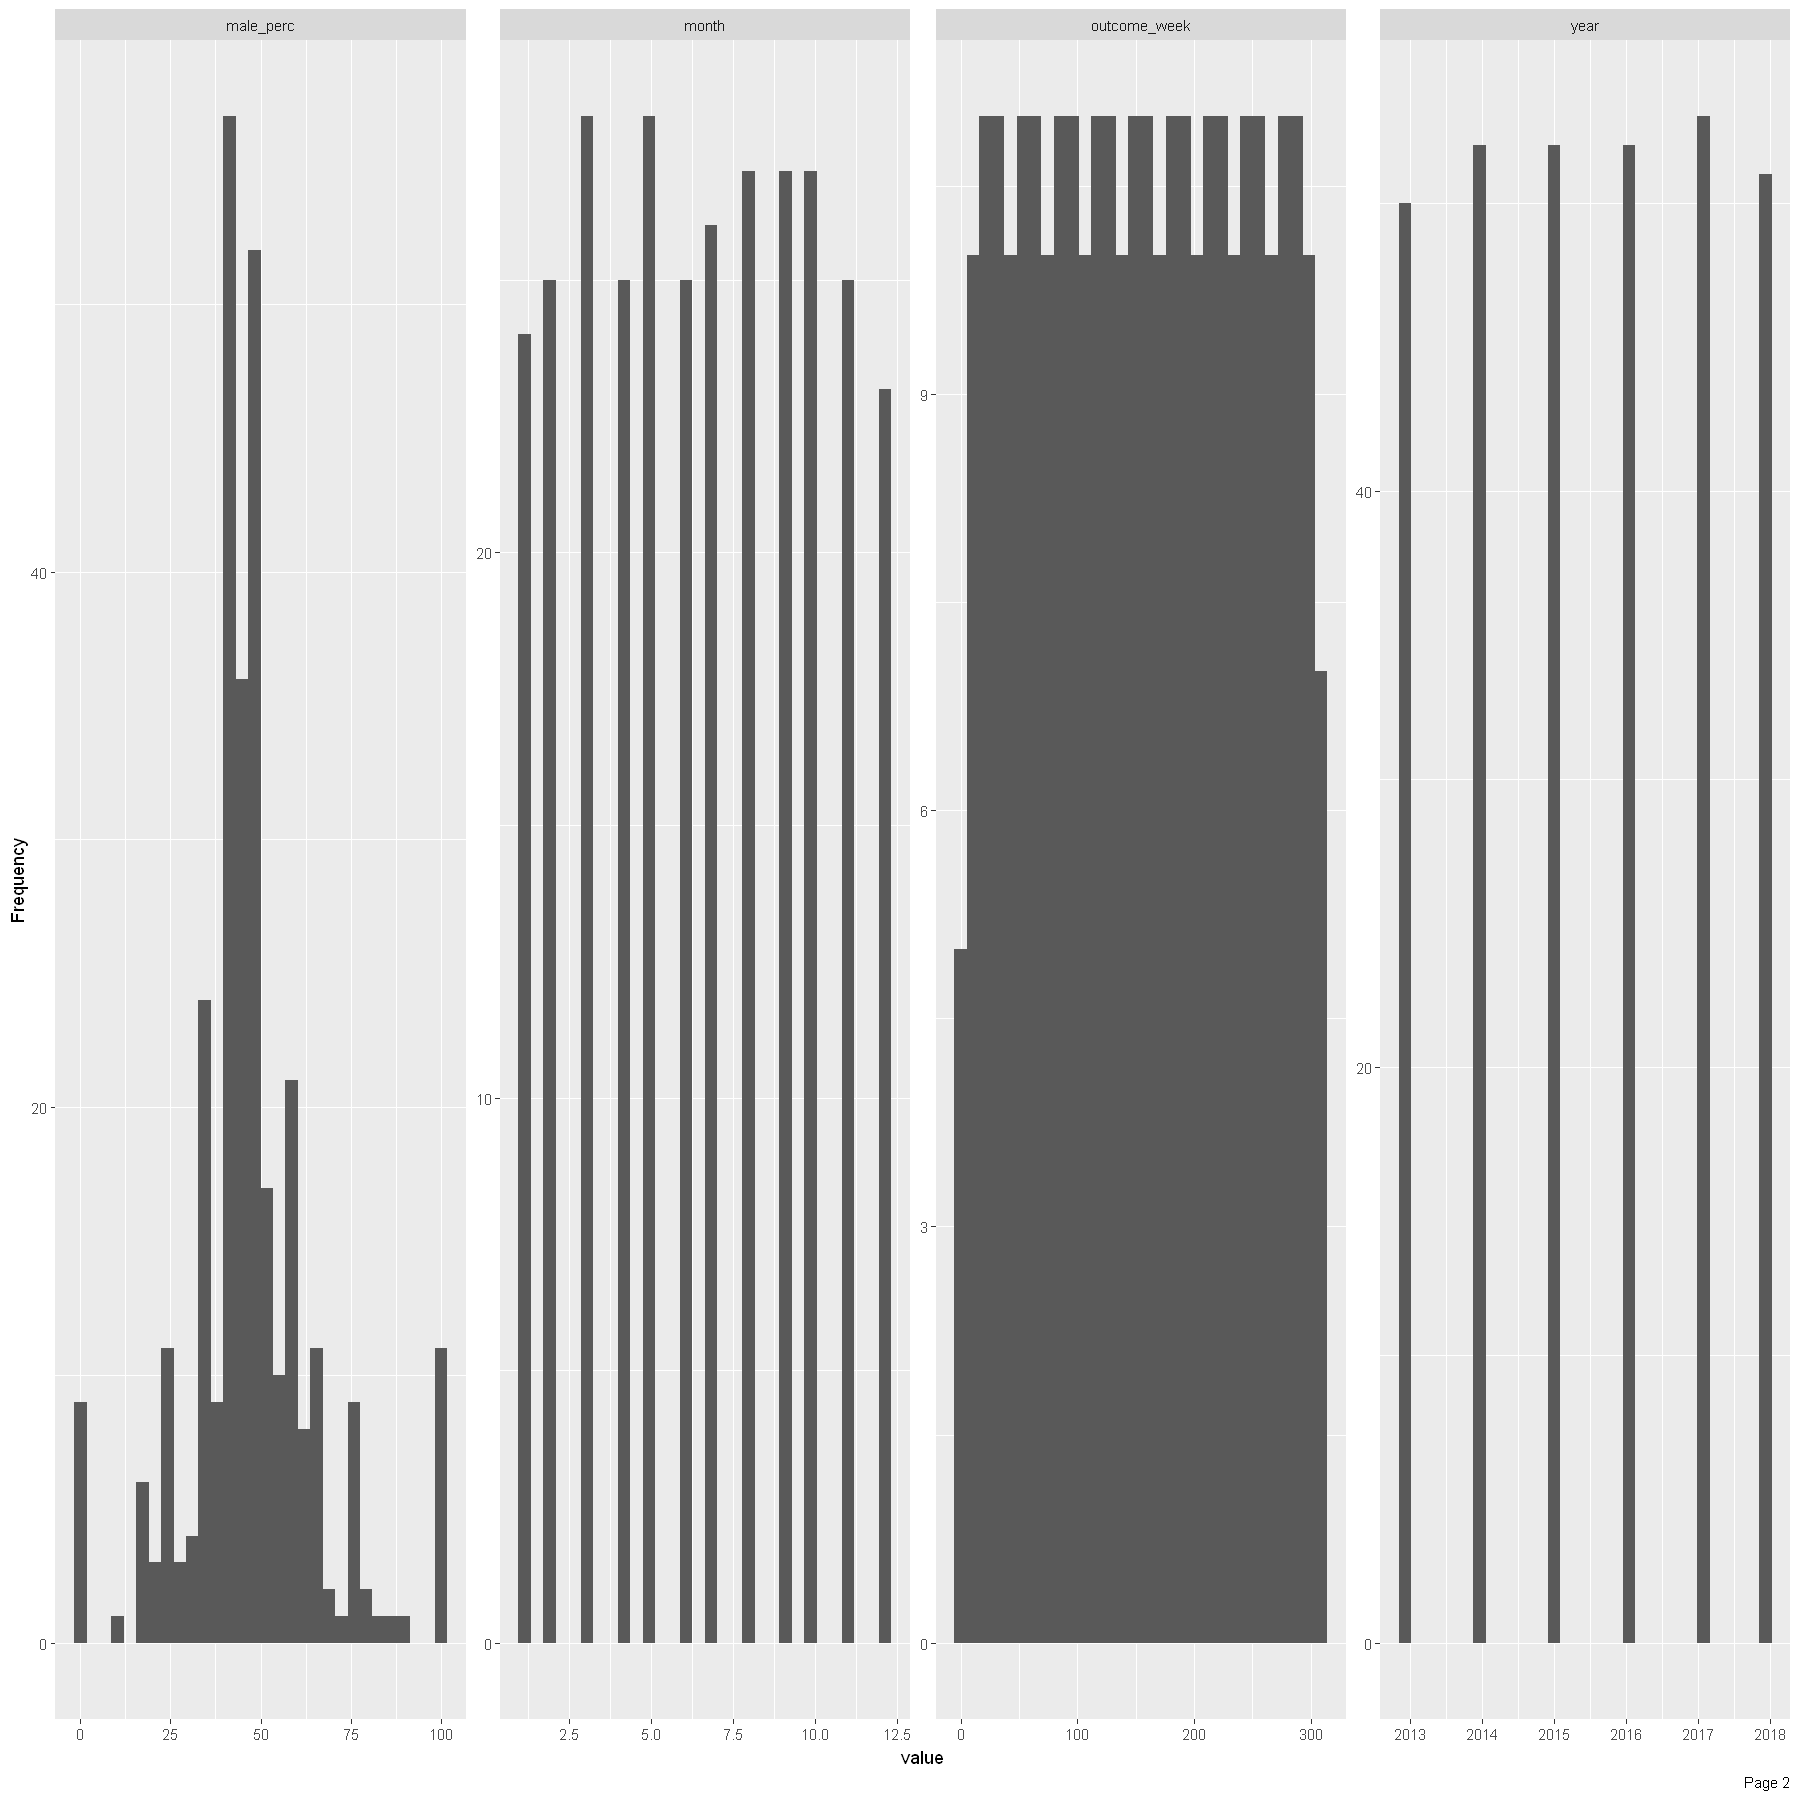

In [59]:
plot_histogram(data)

### From a quick view of the curves I can see:
1. The outcome variable is pouson like distibution - moslty low values. maybe consider log transformation later. 
2. same is true for wk_avg_precipitation
3.should remove the cum_week and the outcome_week variables as its a duplicate
4. some variables - such as wk_min_tm, w_dew_p, wk_avg_min_tm - have a two group-like distribution. may consider adding categories. 


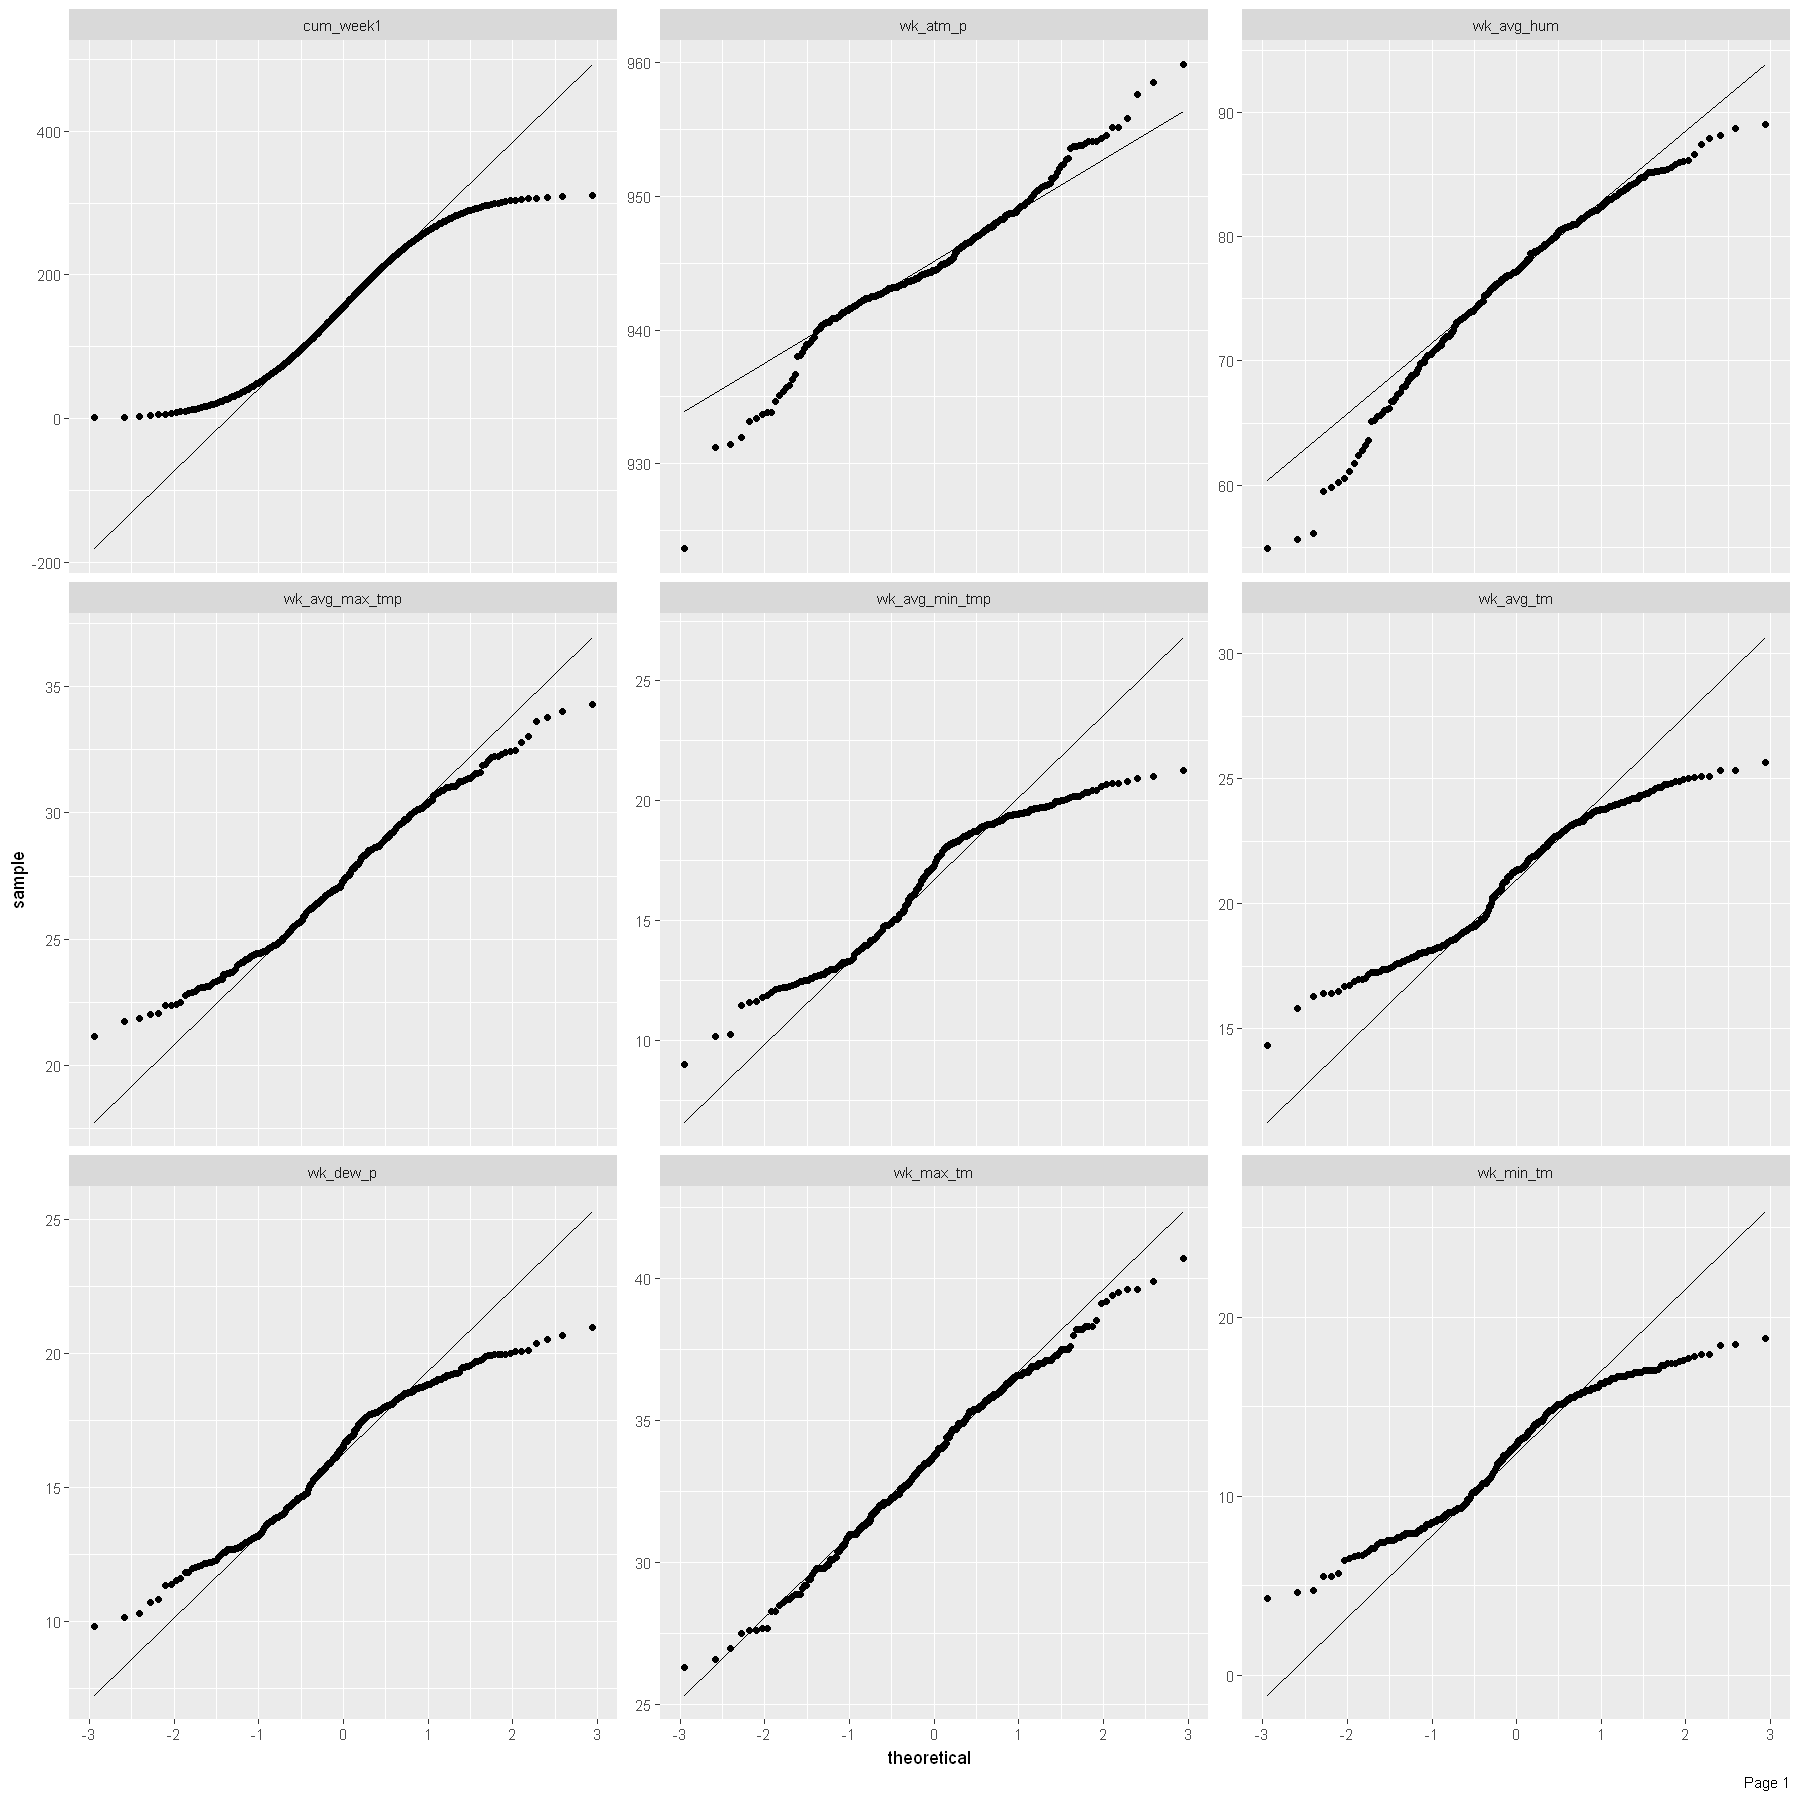

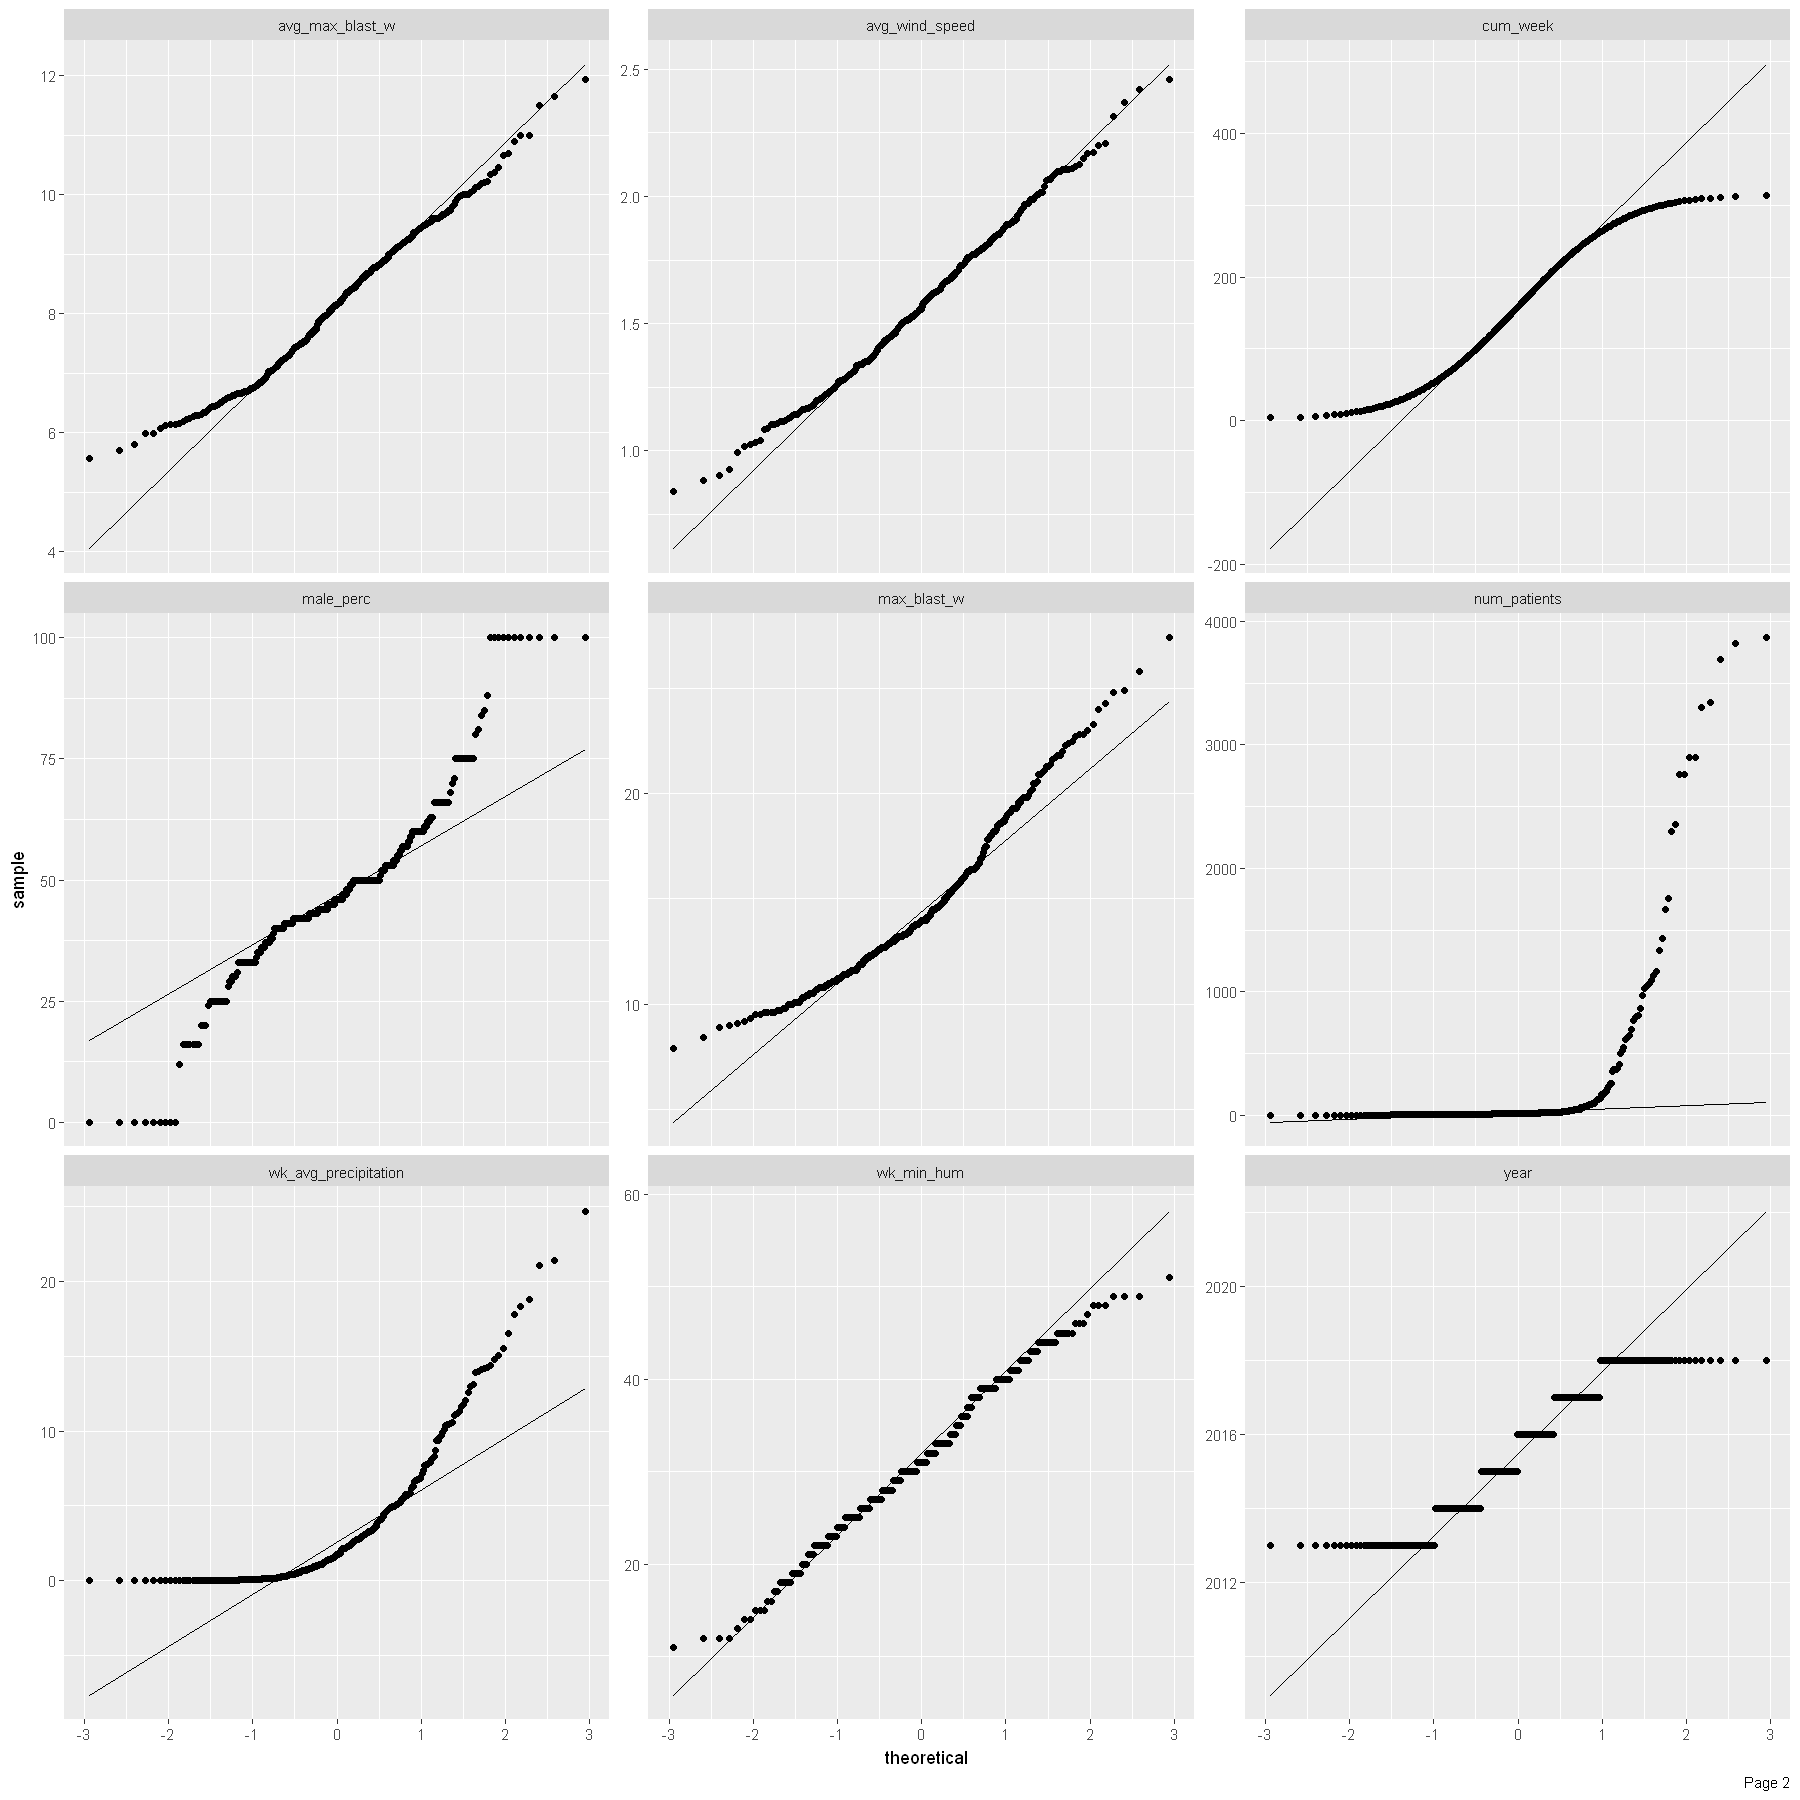

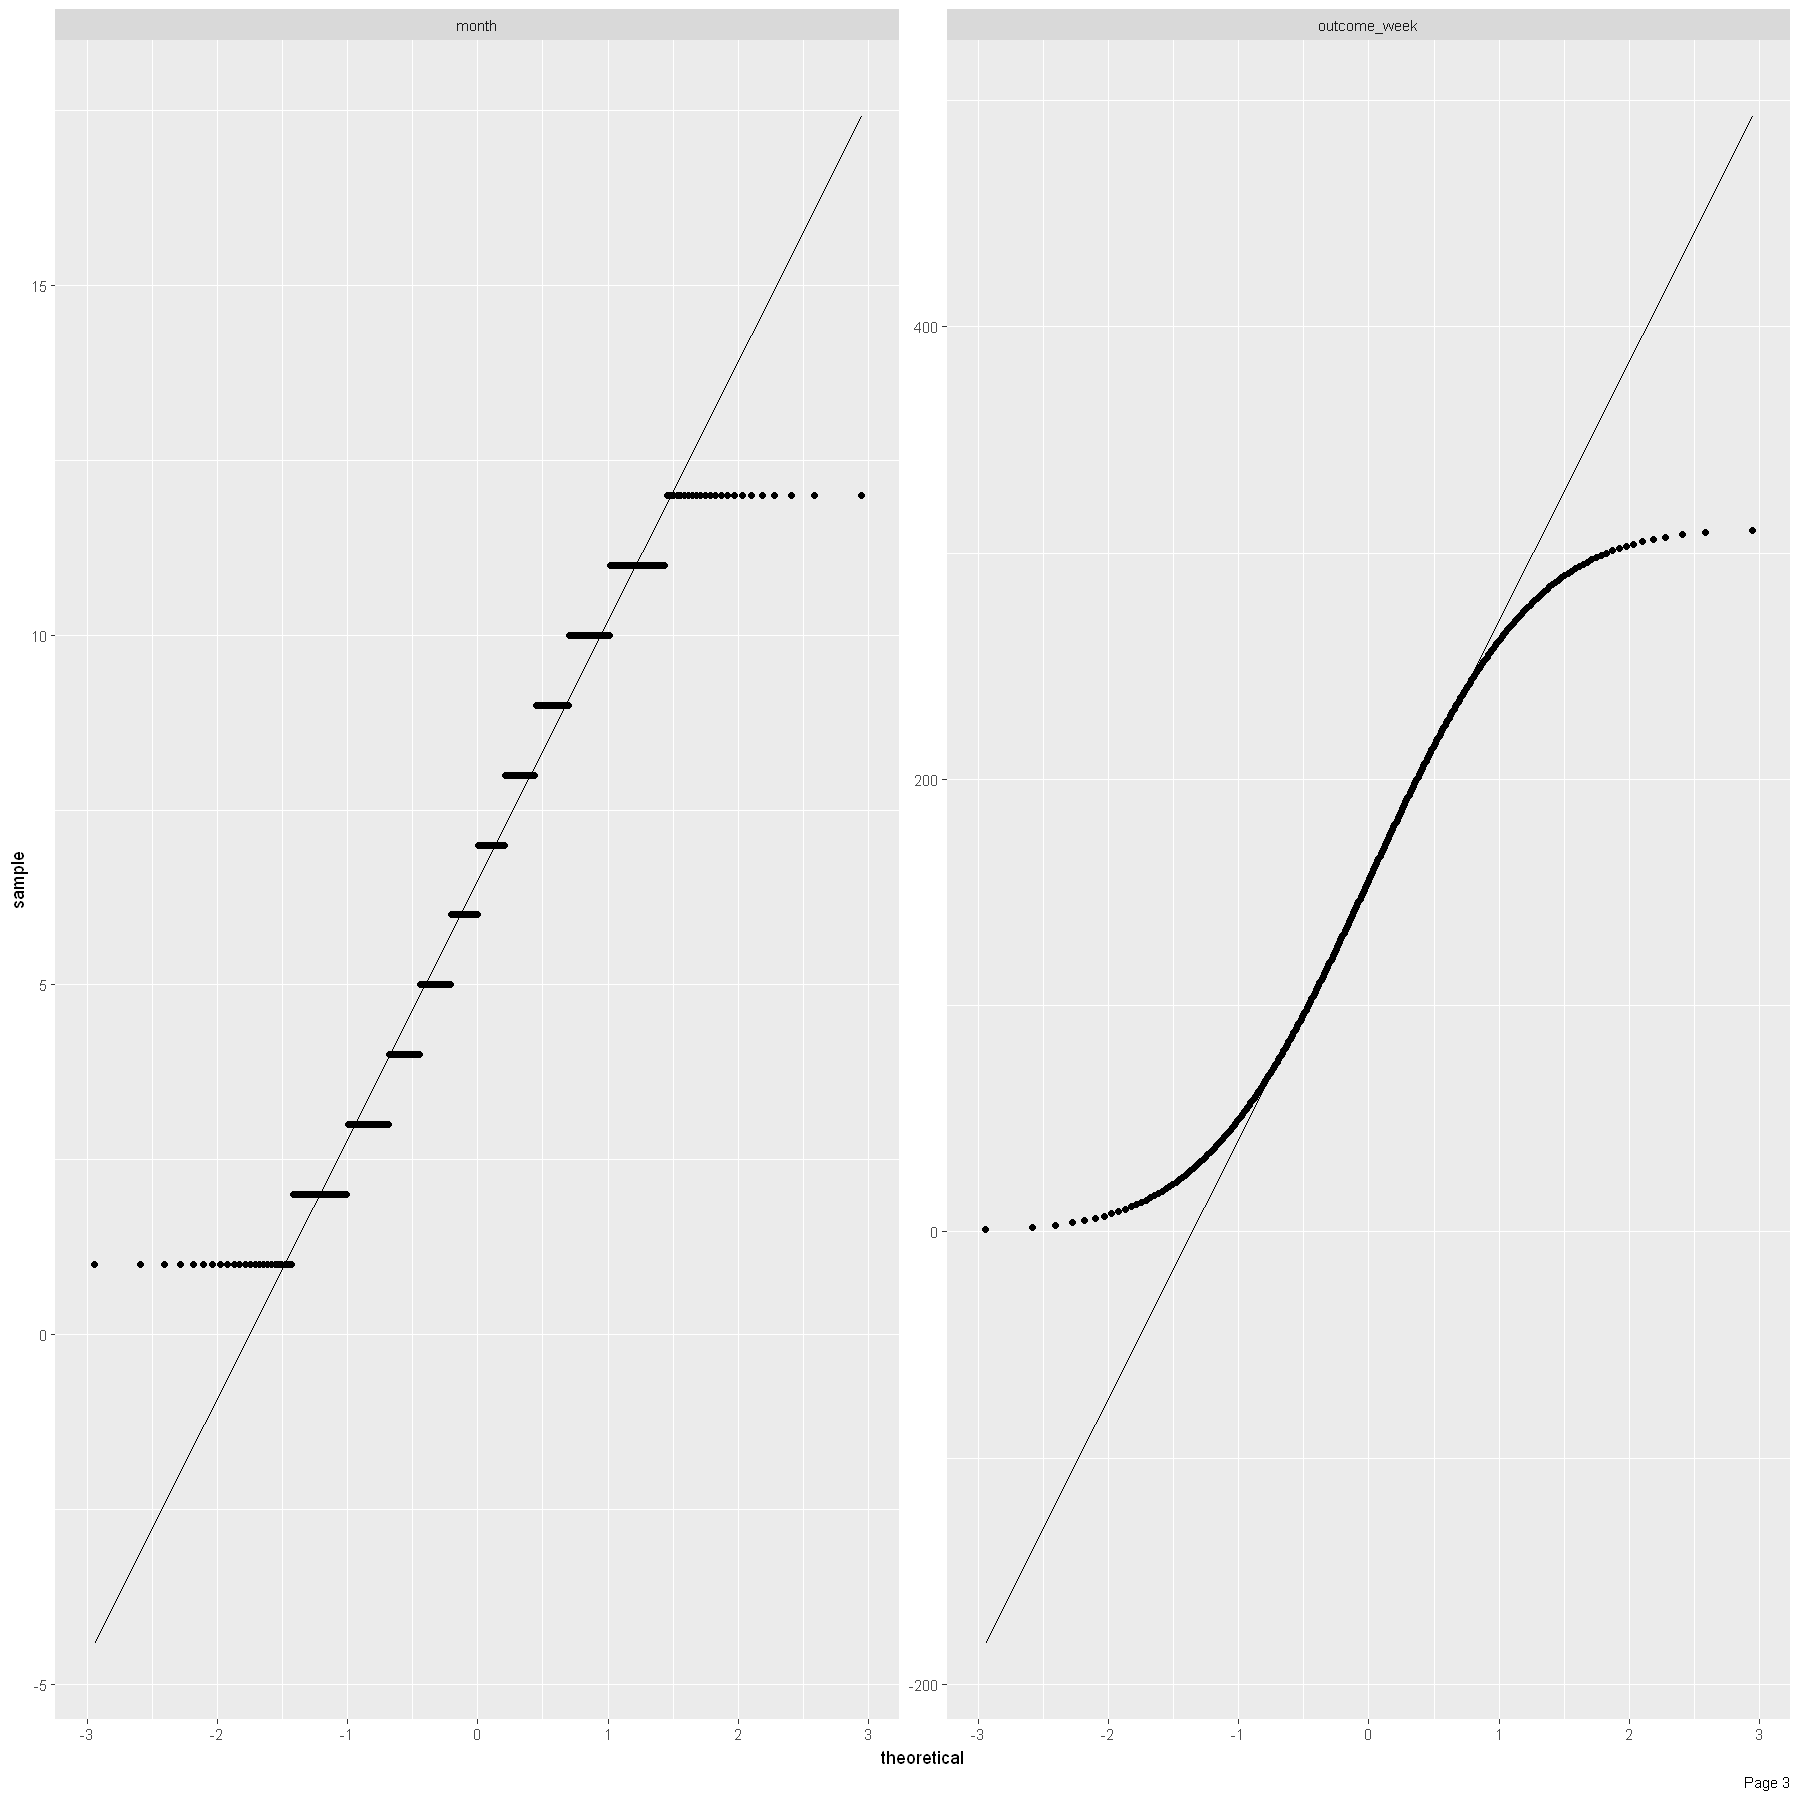

In [60]:
# compare with normal distribution.

plot_qq(data)

In [11]:
#remove the duplicate variabels
final_data <- drop_columns(data, c("cum_week","outcome_week"))

## Check for correlations between the variables 

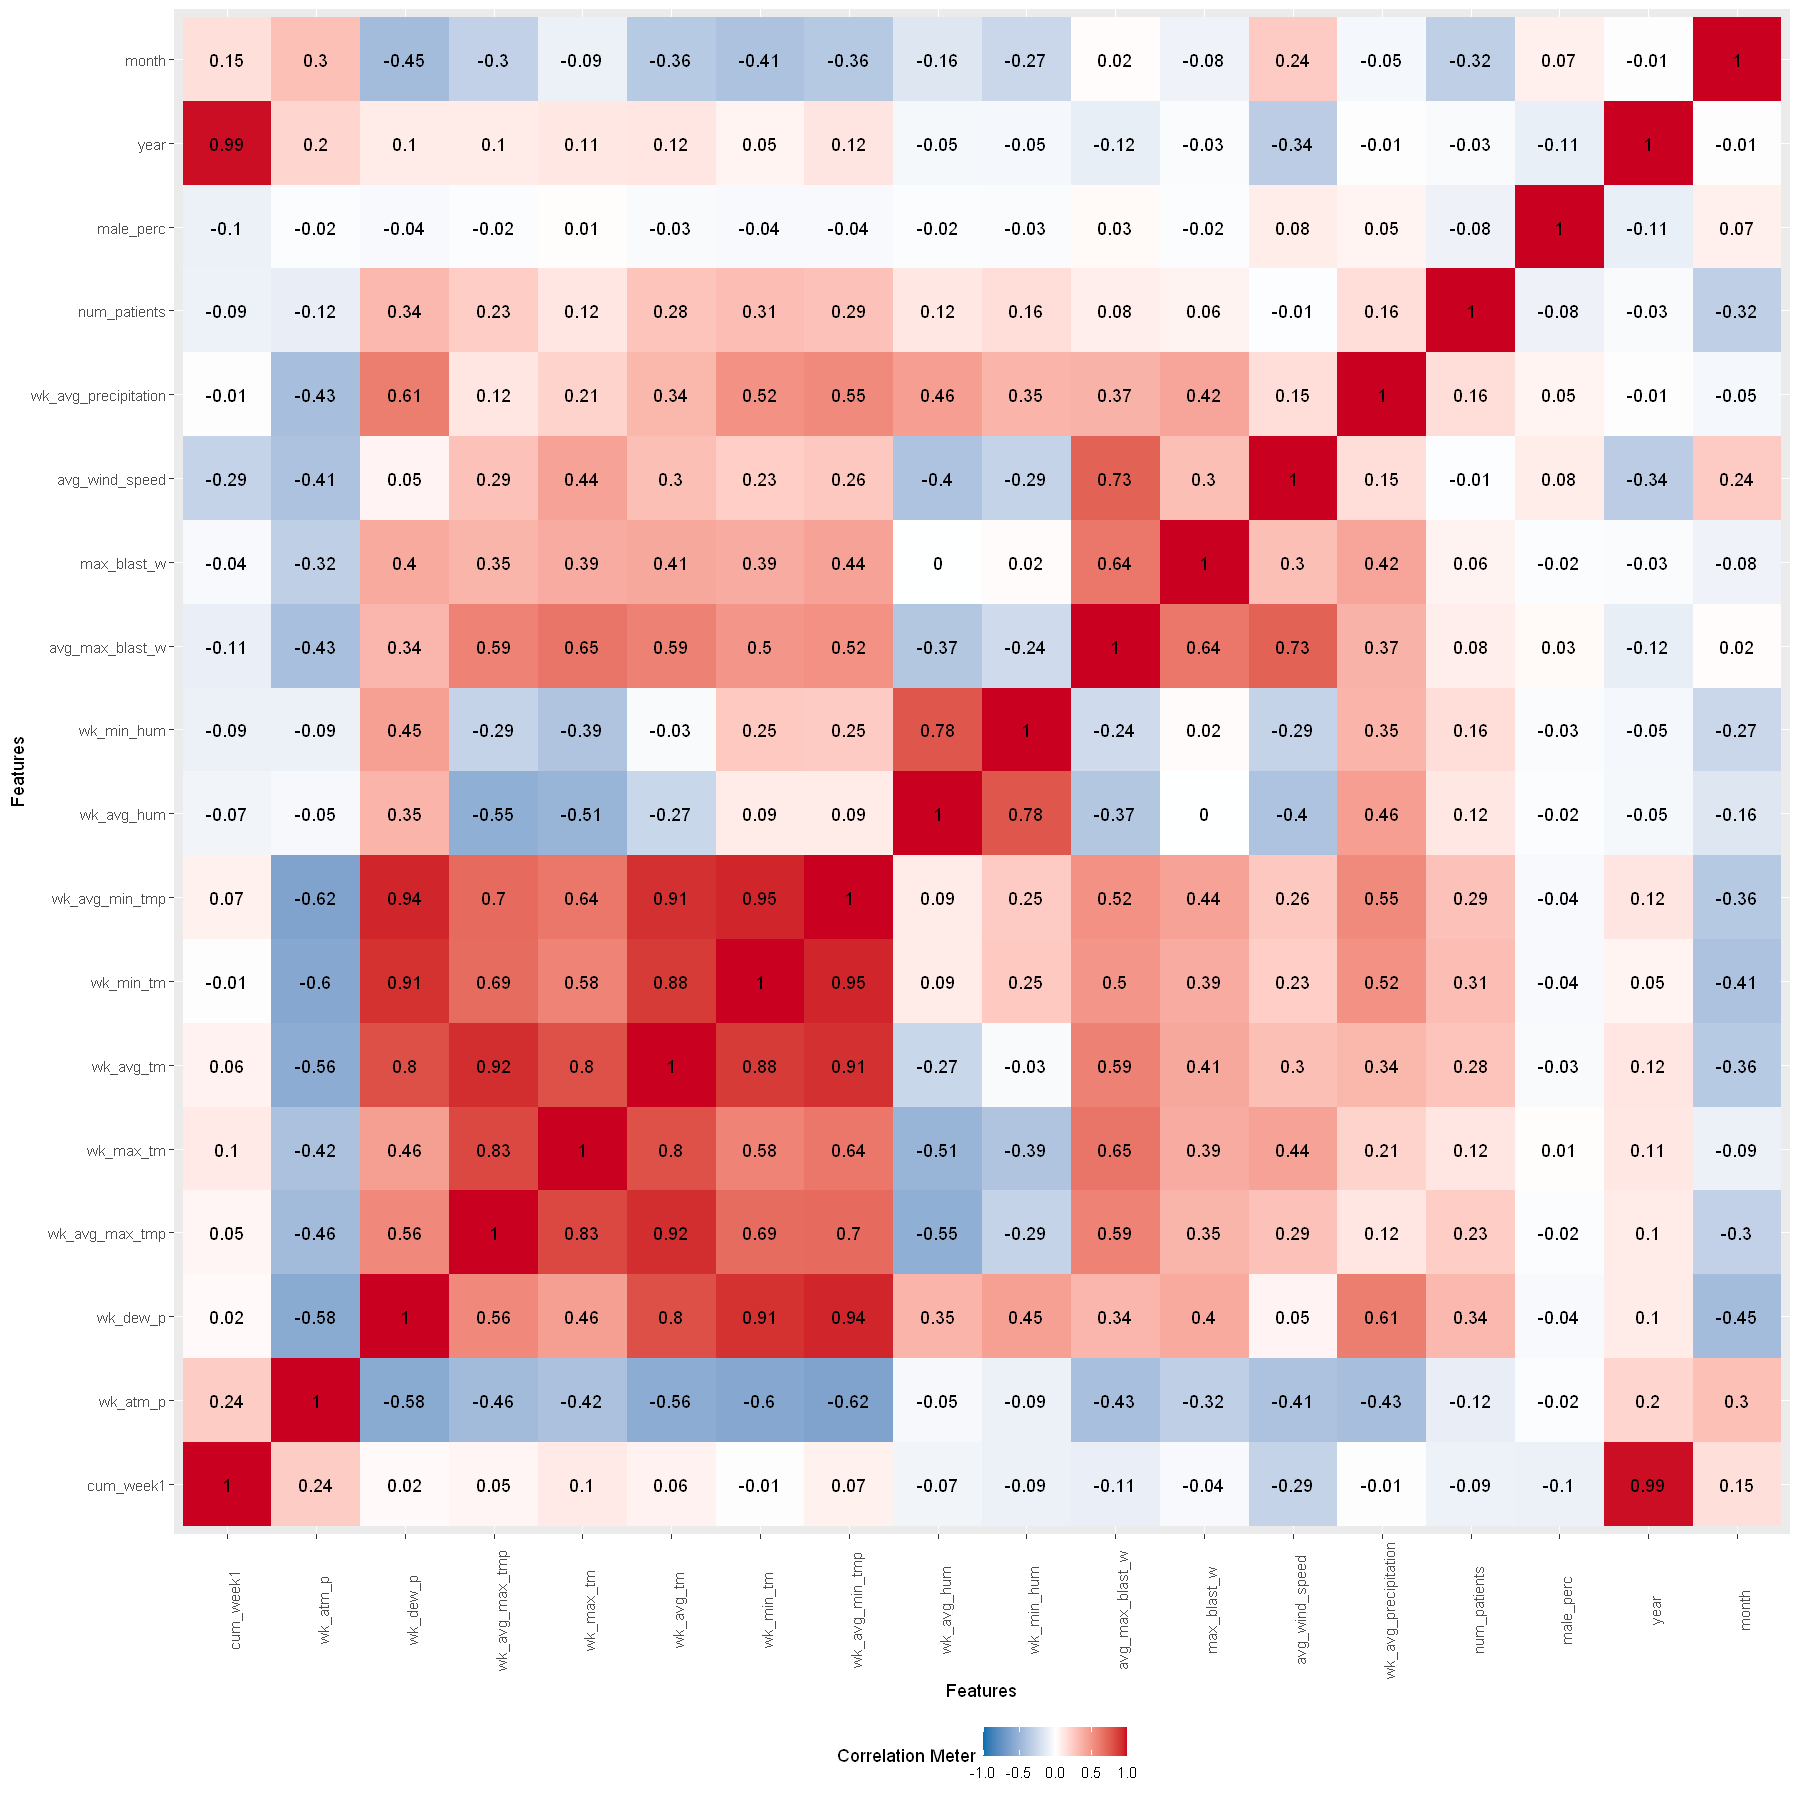

In [330]:
plot_correlation(final_data, maxcat = 5L)

### can see that:
1. the year variable is strongly correlated to the week (obviously)
2.wk_min_temp and wk_avg_min_tmp and wk_avg_tm strongly correlate (0.95 and 0.91)
3. same is true for wk_max_tm and wk_avg_tm (0.8)
4. wind parameters avg_wind_speed and avg_max_blast_wind (0.73)
5. there is a connection between the wk_max_tm and avg_max_blast_w (0.65) 
6. there is a connection between wk_atm_p and wk_min_tm (-0.6) and wk_avg_min_tmp
7. week_dew_p and wk_min_tm (0.9) and wk_avg_min_temp

### Relationship analysis

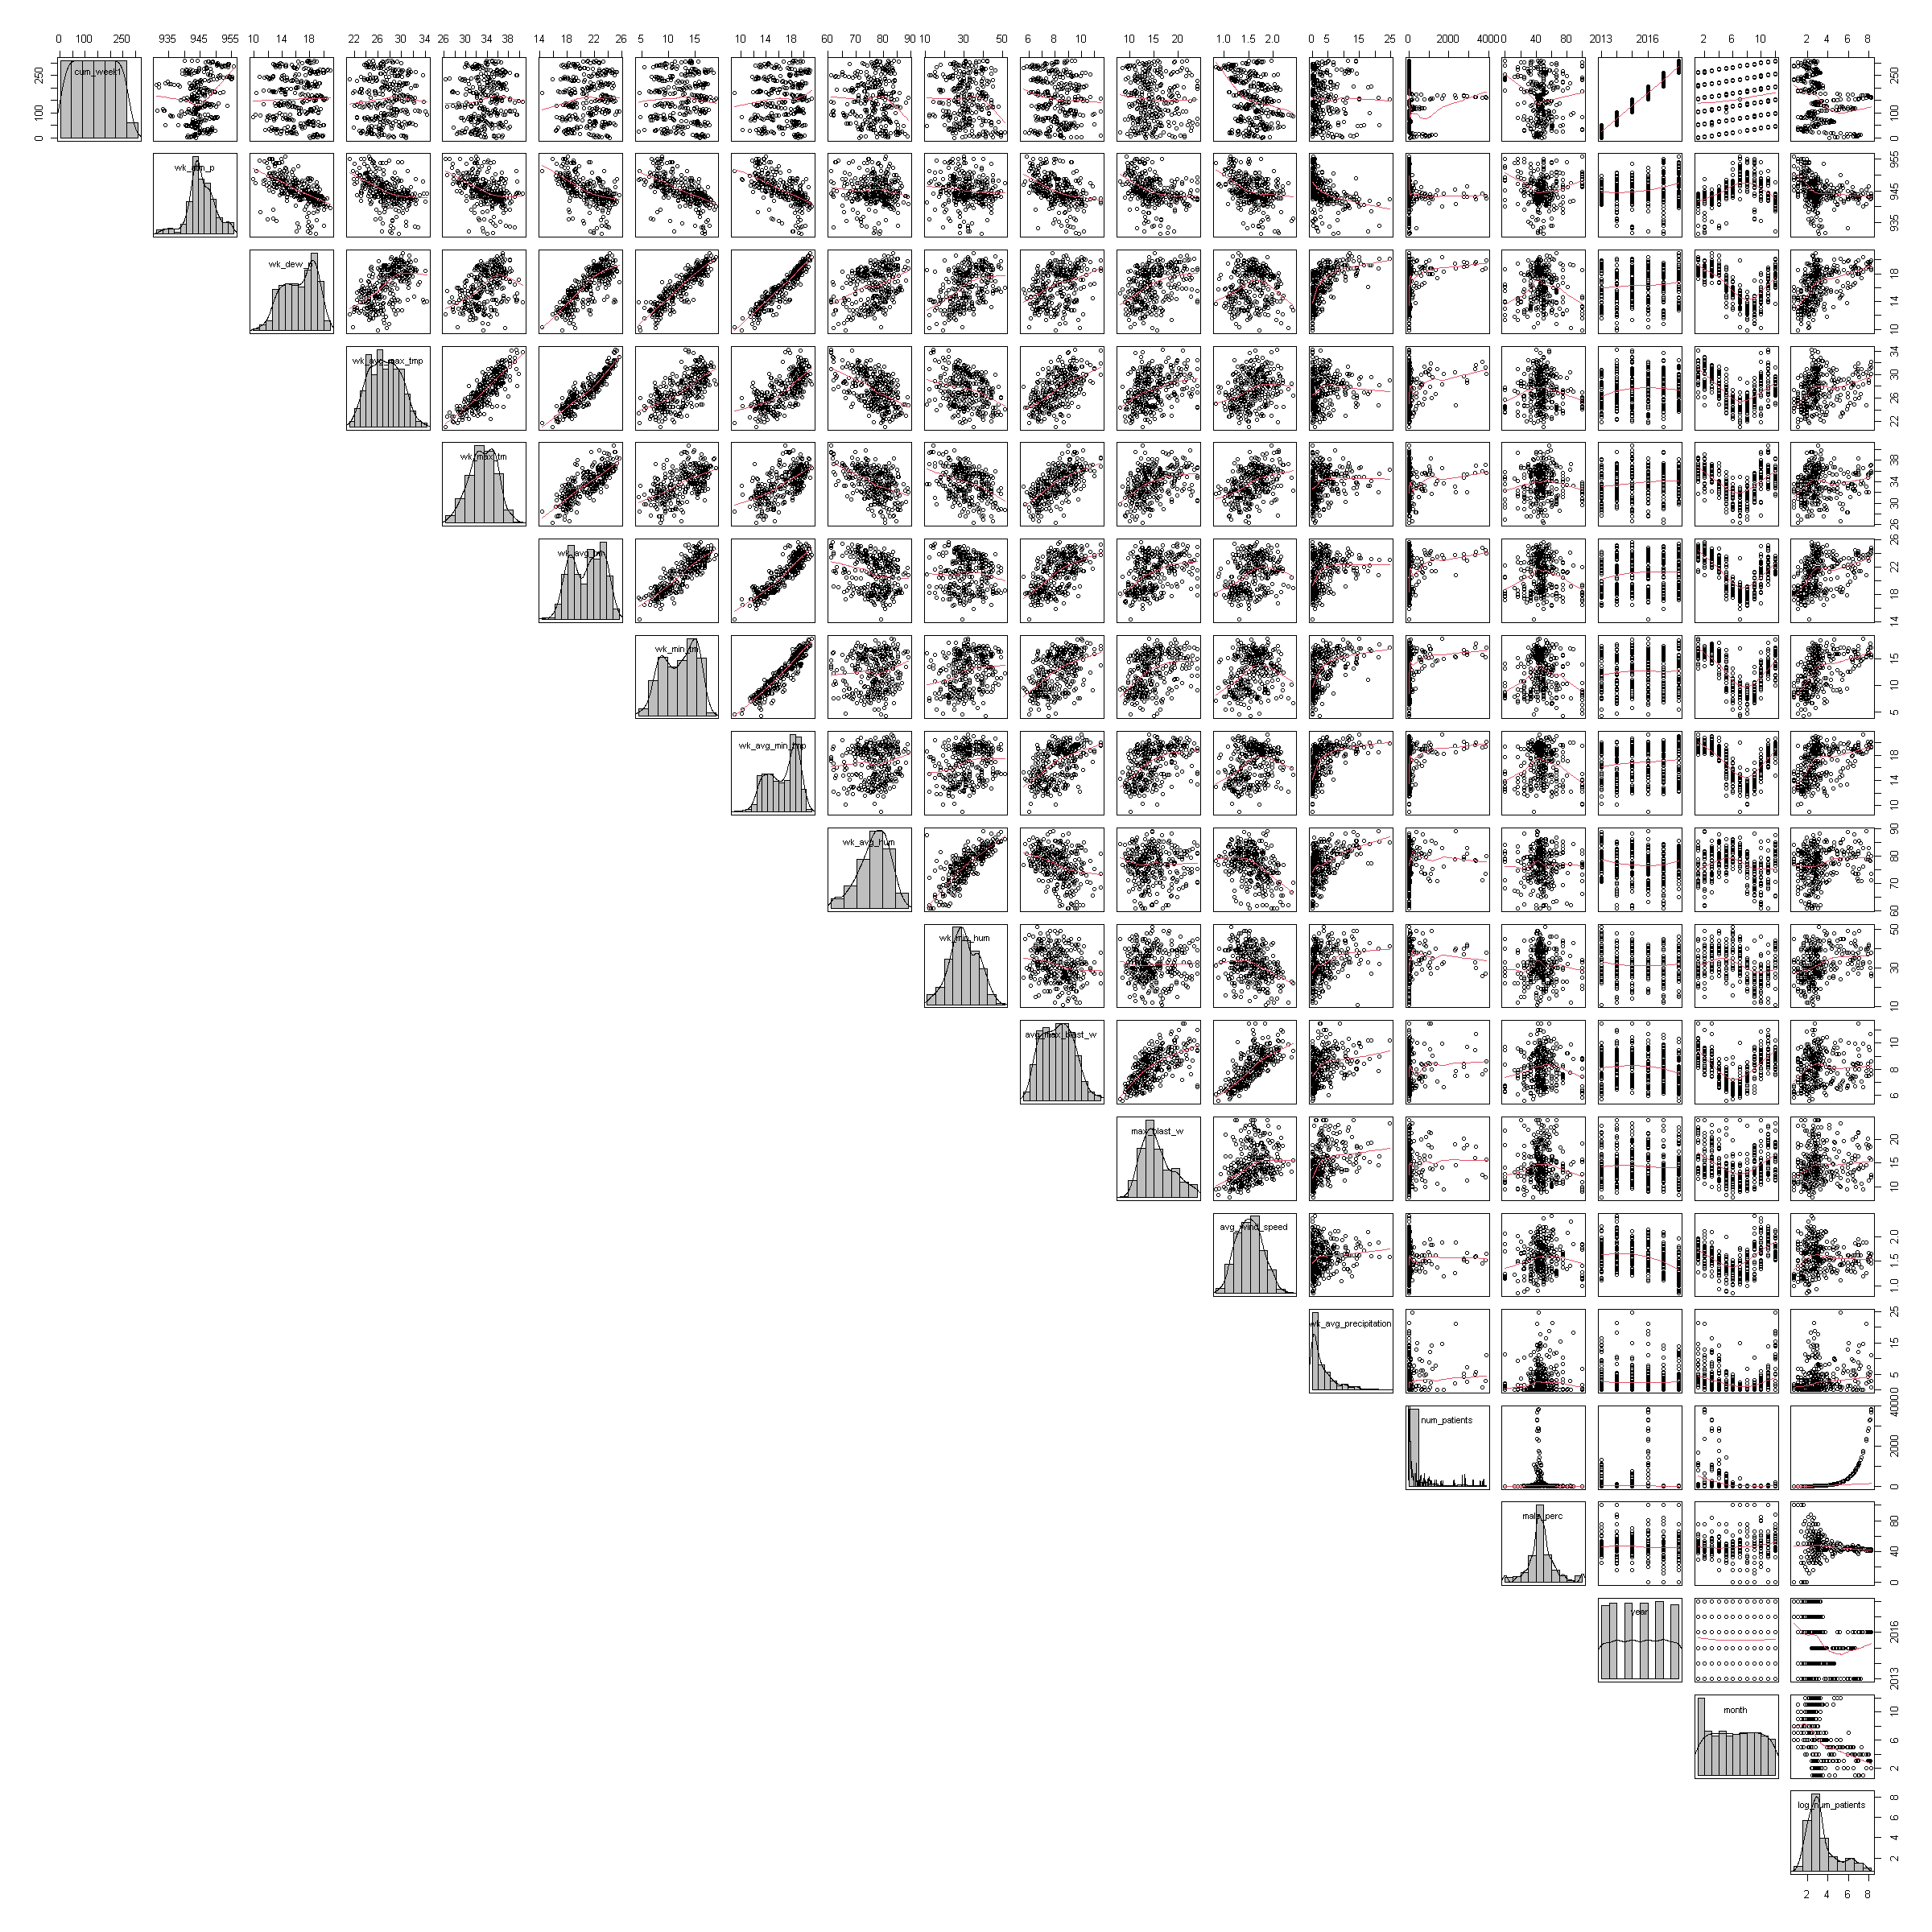

In [488]:
options(repr.plot.width=20, repr.plot.height=20)

library(MESS)
####
pairs(final_data, 
 upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)
# I can see some variables have a 2 group like distribution (e.g. wk_dew_p, wk_avg_min_temp, wk_min_tmp)
# They are also correlated in the diagram above.

## nothing seems to be directly correlated to the num_patients...

### We can do scatter plots to see the nature of these connections

In [489]:
#make the plots smaller again..
options(repr.plot.width=6, repr.plot.height=6)

`geom_smooth()` using formula 'y ~ x'



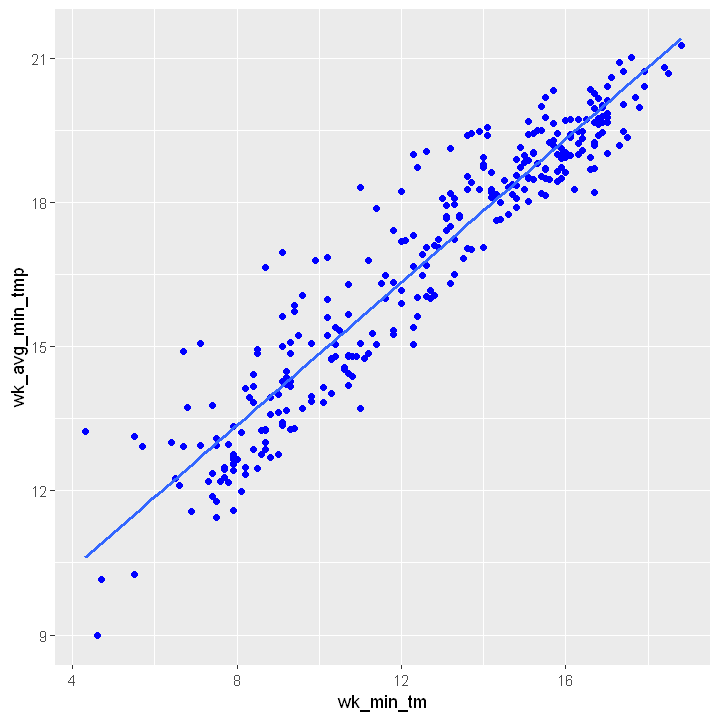

In [345]:
ggplot(data = final_data, aes(x = wk_min_tm, y = wk_avg_min_tmp)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE)

# looks linear

`geom_smooth()` using formula 'y ~ x'



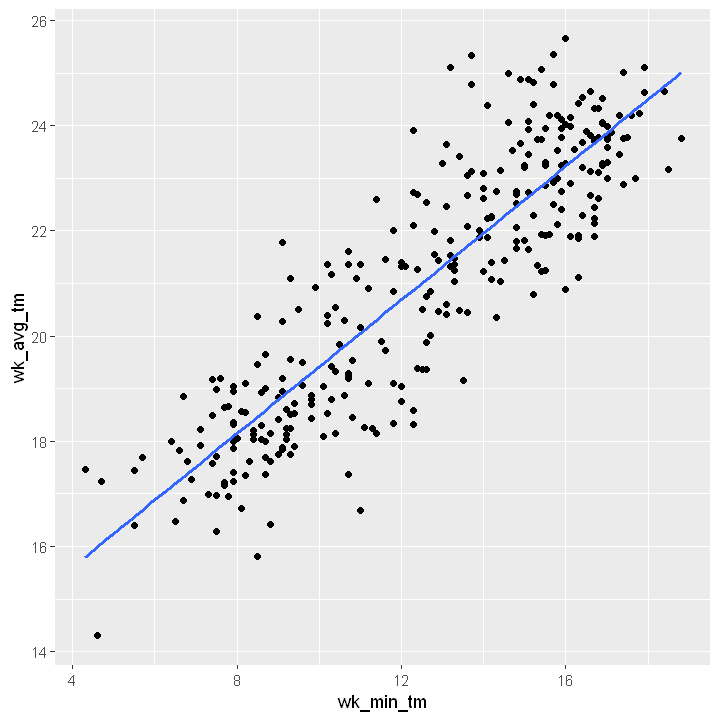

In [346]:
ggplot(data = final_data, aes(x = wk_min_tm, y = wk_avg_tm)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE)
# this has a bigger variability

In [ ]:
ggplot(data = final_data, aes(x = wk_min_tm, y = wk_avg_min_tmp)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE)

# looks linear

`geom_smooth()` using formula 'y ~ x'



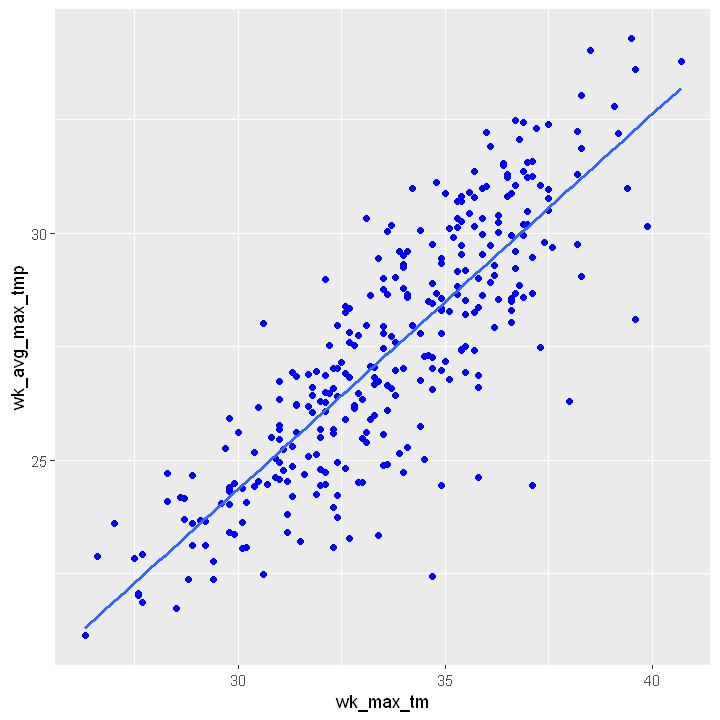

In [347]:
ggplot(data = final_data, aes(x = wk_max_tm, y = wk_avg_max_tmp)) + 
  geom_point(color='blue') +
  geom_smooth(method = "lm", se = FALSE)

# looks linear

#### Overall it seems that the temperatures are linear, and it makes sense that the avarages correlate as well.

`geom_smooth()` using formula 'y ~ x'



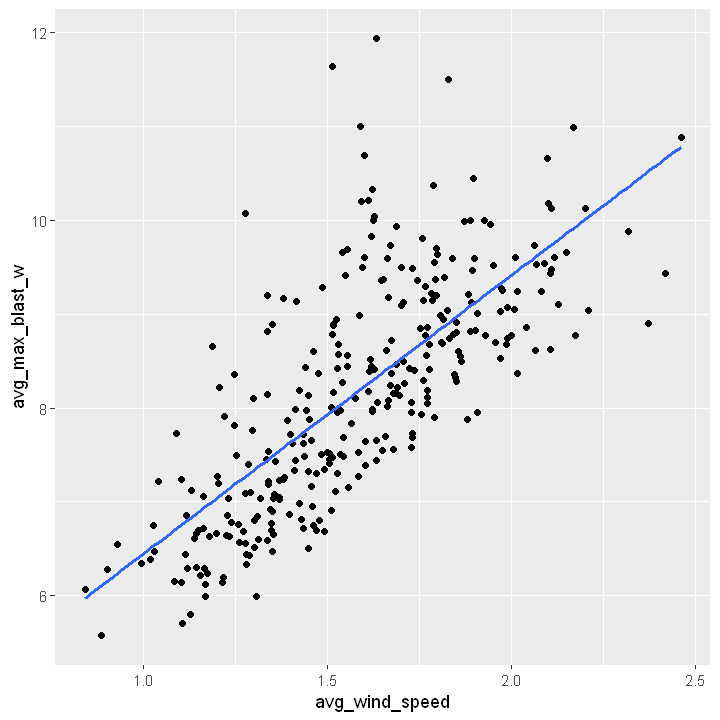

In [349]:
# now the wind: 
ggplot(data = final_data, aes(x = avg_wind_speed, y = avg_max_blast_w)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE)
# this has a bigger variability - but still linear
# looks like there are some possible outliers!

`geom_smooth()` using formula 'y ~ x'



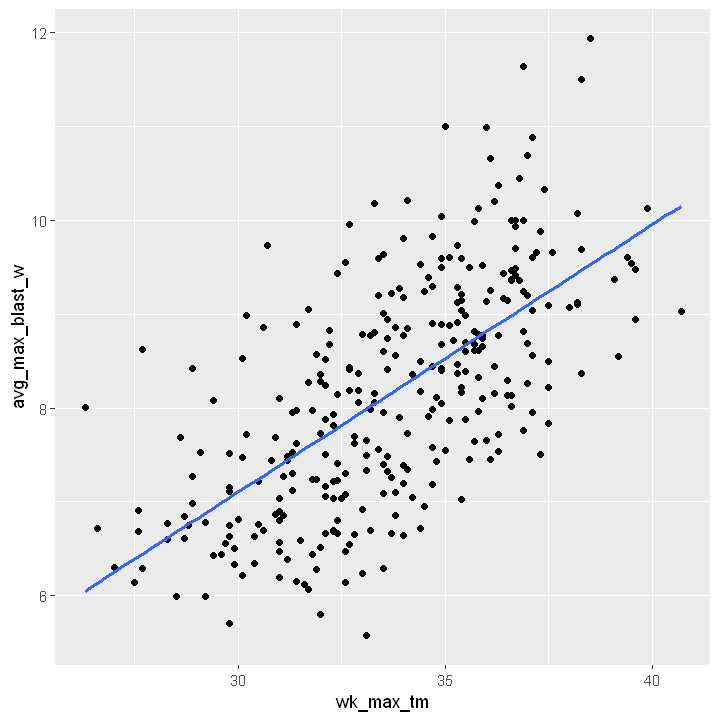

In [350]:
# now the wind vs. temp: 
ggplot(data = final_data, aes(x = wk_max_tm, y = avg_max_blast_w)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE)
#thats a good distribution. there are still a few outliers there

`geom_smooth()` using formula 'y ~ x'



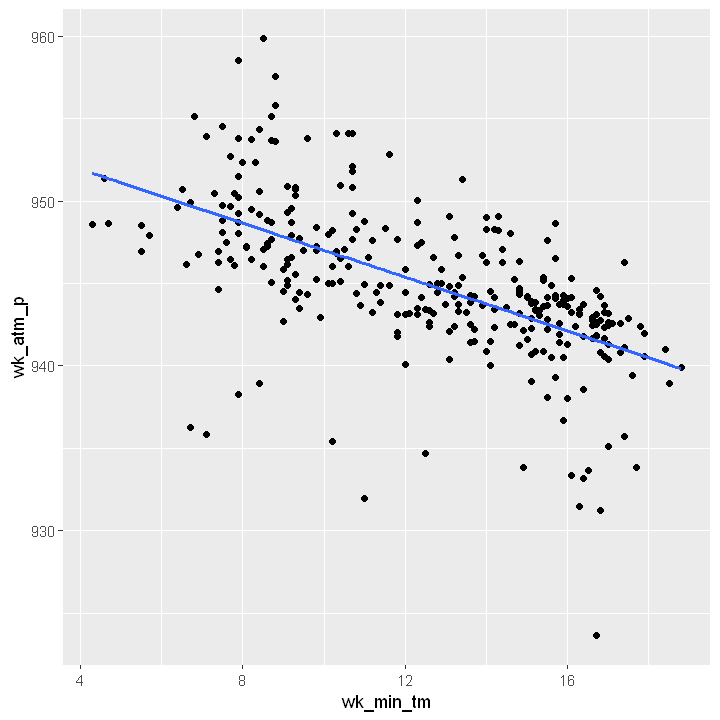

In [352]:
# now the atmospheric pressure vs. min temp: 
ggplot(data = final_data, aes(x = wk_min_tm, y = wk_atm_p)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE)
# thats a good distribution. 
# there are some outliers there

`geom_smooth()` using formula 'y ~ x'



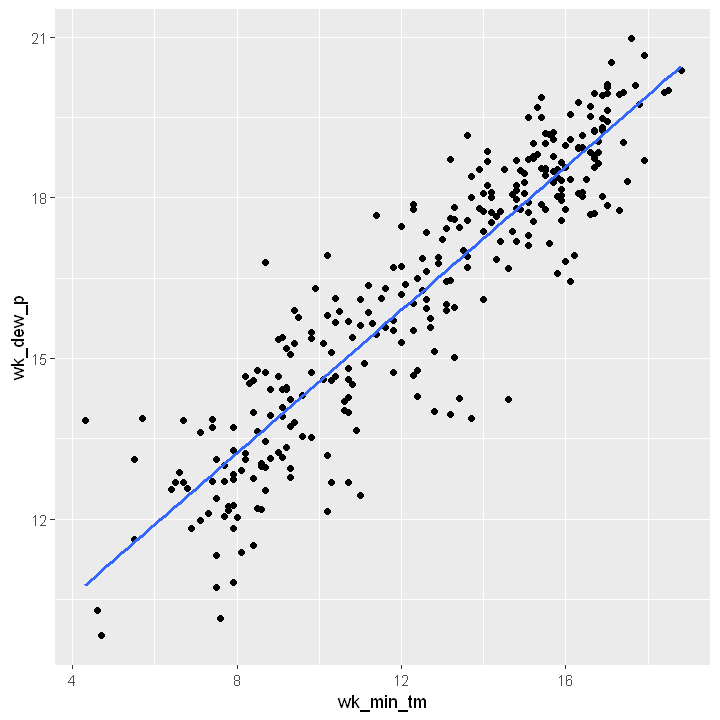

In [354]:
# now the dew point vs. min temp: 
ggplot(data = final_data, aes(x = wk_min_tm, y = wk_dew_p)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE)
# thats a good distribution. 

`geom_smooth()` using formula 'y ~ x'



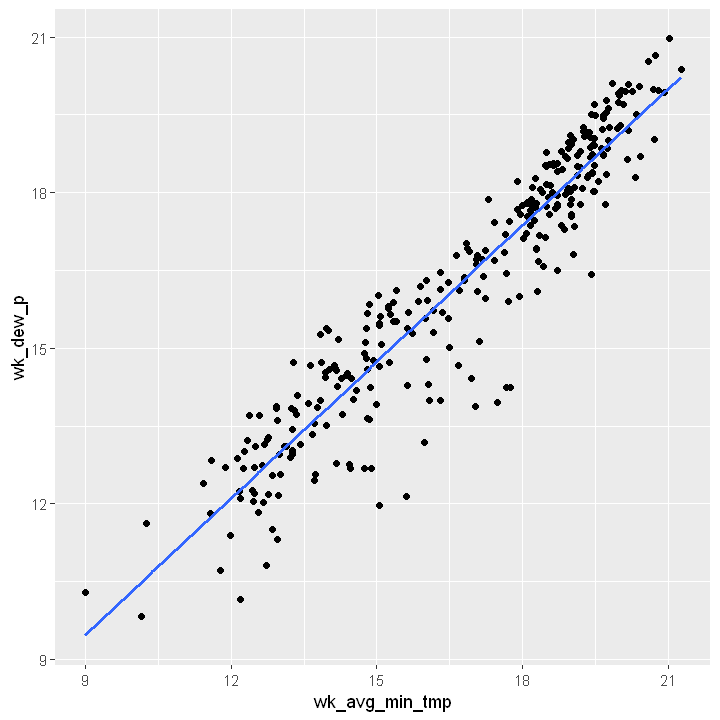

In [356]:
# now the dew point vs. min temp: 
ggplot(data = final_data, aes(x = wk_avg_min_tmp, y = wk_dew_p)) + 
  geom_point(color='black') +
  geom_smooth(method = "lm", se = FALSE)
# thats a strong correlation

### These are 'kept in mind' for later. Maybe I will find literature about these findings.


### Table 1 - variable description

In [357]:
library(psych)
describe(final_data)

# I can see the minimum and the maximum values for each variable

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cum_week1,1,310,155.500000,89.6335131,155.500000,155.500000,114.9015000,1.0000000,310.000000,309.000000,0.0000000000,-1.2116190,5.09084145
wk_atm_p,2,310,944.988439,4.6781363,944.467857,945.008761,3.6626397,923.6331349,959.844792,36.211657,-0.2599229081,1.9054629,0.26570029
wk_dew_p,3,310,16.229868,2.5079429,16.536592,16.324867,2.9916750,9.8259523,20.965990,11.140038,-0.3088532865,-0.9571807,0.14244159
wk_avg_max_tmp,4,310,27.412016,2.7526825,27.293571,27.393430,3.2896511,21.1392857,34.280000,13.140714,0.0764744862,-0.7597961,0.15634186
wk_max_tm,5,310,33.701935,2.7796876,33.750000,33.775403,2.8910700,26.3000000,40.700000,14.400000,-0.1887401922,-0.4228910,0.15787564
wk_avg_tm,6,310,20.997652,2.4679280,21.321012,21.034660,3.2912838,14.3075000,25.648869,11.341369,-0.1447970305,-1.1446990,0.14016889
wk_min_tm,7,310,12.490000,3.4201663,12.900000,12.591935,4.4478000,4.3000000,18.800000,14.500000,-0.2267759447,-1.1307719,0.19425239
wk_avg_min_tmp,8,310,16.706179,2.6958023,17.271429,16.843407,3.2172420,8.9885714,21.268571,12.280000,-0.4001007418,-1.0335831,0.15311128
wk_avg_hum,9,310,76.598621,6.2027253,77.222798,77.063922,5.6465456,54.8607144,89.044048,34.183333,-0.7683395131,0.6673709,0.35229112


#### From the table I can see that  wk_avg_precipitation, and the num_patients have a difference between the mean and the median - but we knew that from the distribution plots already.  

## Outliers 


### "The rules" for outliers (from the slides)
#### If it is obviously due to incorrectly entered or measured data, drop it
#### If it creates a significant association, drop it
#### If it does not change the association but affects the distribution, drop it (report!)
#### If it affects both the association and the distribution. Don’t drop it. (Analyze with and without. Report!)

In [9]:
# From the class 
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(final_data)
    outdata <- data.frame(row1=1:nrow(final_data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            outlow <- quantile(final_data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(final_data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

In [12]:
df_out <- outlierMatrix(final_data)
head(df_out)

,cum_week1,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_max_tm,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,avg_max_blast_w,max_blast_w,avg_wind_speed,wk_avg_precipitation,num_patients,male_perc,year,month
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
summary (df_out)

   cum_week1    wk_atm_p          wk_dew_p wk_avg_max_tmp   wk_max_tm
 Min.   :0   Min.   :0.00000   Min.   :0   Min.   :0      Min.   :0  
 1st Qu.:0   1st Qu.:0.00000   1st Qu.:0   1st Qu.:0      1st Qu.:0  
 Median :0   Median :0.00000   Median :0   Median :0      Median :0  
 Mean   :0   Mean   :0.04516   Mean   :0   Mean   :0      Mean   :0  
 3rd Qu.:0   3rd Qu.:0.00000   3rd Qu.:0   3rd Qu.:0      3rd Qu.:0  
 Max.   :0   Max.   :1.00000   Max.   :0   Max.   :0      Max.   :0  
   wk_avg_tm   wk_min_tm wk_avg_min_tmp   wk_avg_hum        wk_min_hum
 Min.   :0   Min.   :0   Min.   :0      Min.   :0.00000   Min.   :0   
 1st Qu.:0   1st Qu.:0   1st Qu.:0      1st Qu.:0.00000   1st Qu.:0   
 Median :0   Median :0   Median :0      Median :0.00000   Median :0   
 Mean   :0   Mean   :0   Mean   :0      Mean   :0.02903   Mean   :0   
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:0      3rd Qu.:0.00000   3rd Qu.:0   
 Max.   :0   Max.   :0   Max.   :0      Max.   :1.00000   Max.   :0   
 avg_max_blas

In [30]:
length(subset(df_out, df_out==1))

[1] 18

##### From this summary I can see that the following parameters have outliers:
wk_atm_p, wk_avg_hum, avg_max_blast_w , max_blast_w ,avg_wind_speed

The num_patients and the wk_avg_precipitation - we know they are not normaly distributed. So we will deal with them later.

### Box plots are a good way to detect outliers
A boxplot helps to visualize a quantitative variable by displaying five common location summary (minimum, median, first and third quartiles and maximum) and any observation that was classified as a suspected outlier using the interquartile range (IQR) criterion. 

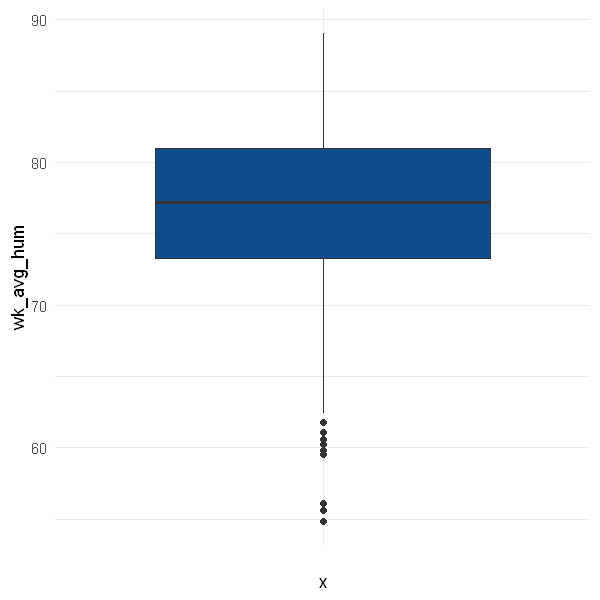

In [454]:
#we can now look individualy at the above variables

# The avg humidity:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(final_data) +
  aes(x = "", y = wk_avg_hum) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

In [455]:
#see the actual values
boxplot.stats(final_data$wk_avg_hum)$out

[1] 59.82054 60.55595 54.86071 59.49430 60.23333 55.61310 56.08185 61.08185

In [456]:
# on which row
out <- boxplot.stats(final_data$wk_avg_hum)$out
out_ind <- which(final_data$wk_avg_hum %in% c(out))
out_ind

[1]  91  93  94 108 143 146 250 251

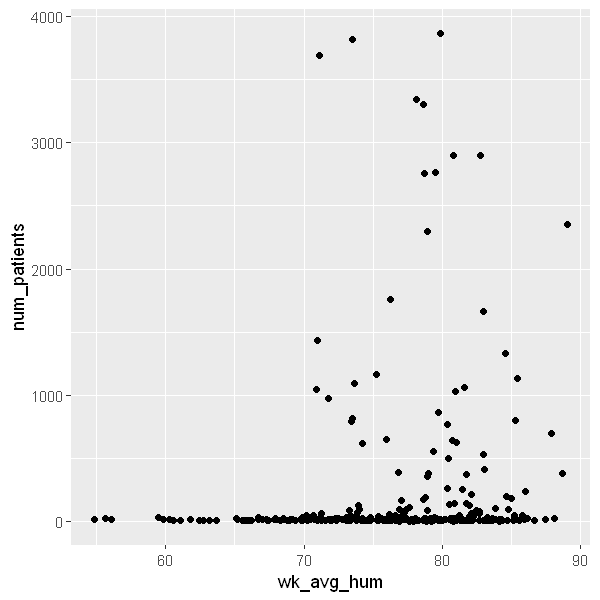

In [457]:
# distribution vs. the outcome
ggplot(data = final_data, aes(x = wk_avg_hum, y = num_patients)) + 
  geom_point(color='black')

`geom_smooth()` using formula 'y ~ x'



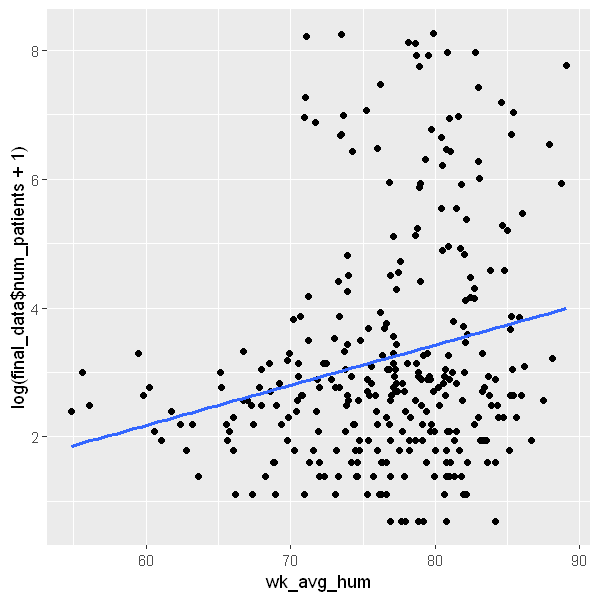

In [458]:
# with the log of the num_patients (the outcome) - better

ggplot(data = final_data, aes(x = wk_avg_hum, y = log(final_data$num_patients+1))) + 
  geom_point(color='black') + geom_smooth(method = "lm", se = FALSE)

# can see that they slightly change the distribution

In [459]:
# create the log variable - so it's easier. (Thomas - yes its before the end of EDA, but for analysis is easier - sorry :))
final_data$log_num_patients <- log(final_data$num_patients+1)

`geom_smooth()` using formula 'y ~ x'



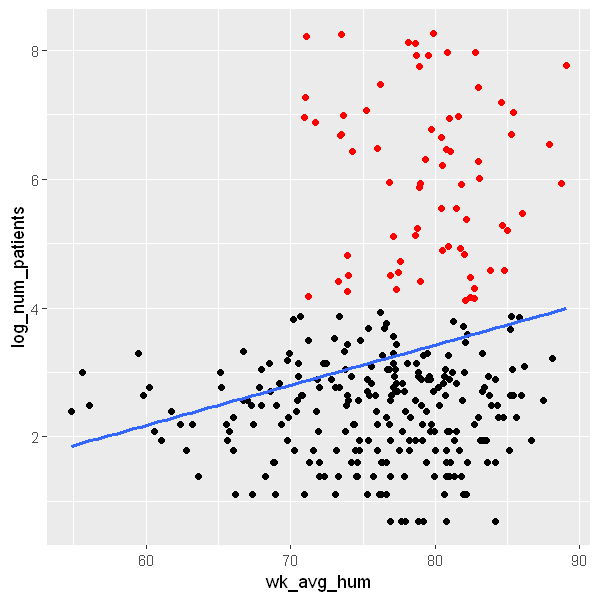

In [460]:
# Also I see that there is a 'high patient group' - that needs to be considered.
ggplot(data = final_data, aes(x = wk_avg_hum, y = log_num_patients)) +
 geom_point(color = ifelse(final_data$log_num_patients > 4, "red", "black")) + 
 geom_smooth(method = "lm", se = FALSE)

In [461]:
# So do the outliers create a false correlation?  
cor.test(final_data$log_num_patients, df_out$wk_avg_hum, method = "spearman")

Warning message in cor.test.default(final_data$log_num_patients, df_out$wk_avg_hum, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  final_data$log_num_patients and df_out$wk_avg_hum
S = 5161346, p-value = 0.4881
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.03952185 


In [462]:
var1 <- final_data$wk_avg_hum[which(df_out$wk_avg_hum==0)]
var2 <- final_data$log_num_patients[which(df_out$wk_avg_hum==0)]

cor.test(as.numeric(var2), var1, method = "spearman")

# although they are not realy conneted to the outcome, it seems they may be connected 
# (i.e. all outliers are in the "low patient num zone" - the black area in the figure above). 

Warning message in cor.test.default(as.numeric(var2), var1, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  as.numeric(var2) and var1
S = 3676612, p-value = 0.0008619
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1910823 


In [426]:
#install.packages('data.table') 
library(data.table)
# a function to help me replace outliers
outlierReplace = function(dataframe, cols, rows, newValue = NA) {
    if (any(rows)) {
        set(dataframe, rows, cols, newValue)
    }
}


Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

    between, first, last




In [465]:
# I am being very cousios with NA. I believe that these points are important as they all represent low patient numbers- 
# altough there is no linear correlation.
outlierReplace(final_data, "wk_avg_hum", which(final_data$wk_avg_hum < 61), 62)

`geom_smooth()` using formula 'y ~ x'



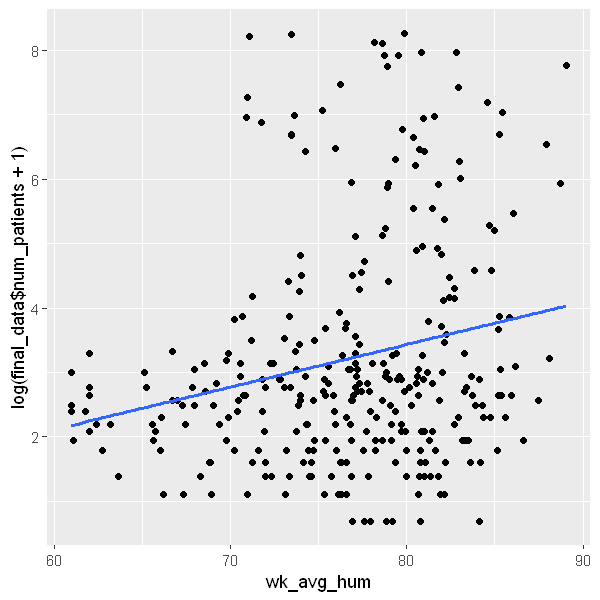

In [466]:
#plot again after correcting the outliers
ggplot(data = final_data, aes(x = wk_avg_hum, y = log(final_data$num_patients+1))) + 
  geom_point(color='black') + geom_smooth(method = "lm", se = FALSE)

# looks good. we can move to the next one.

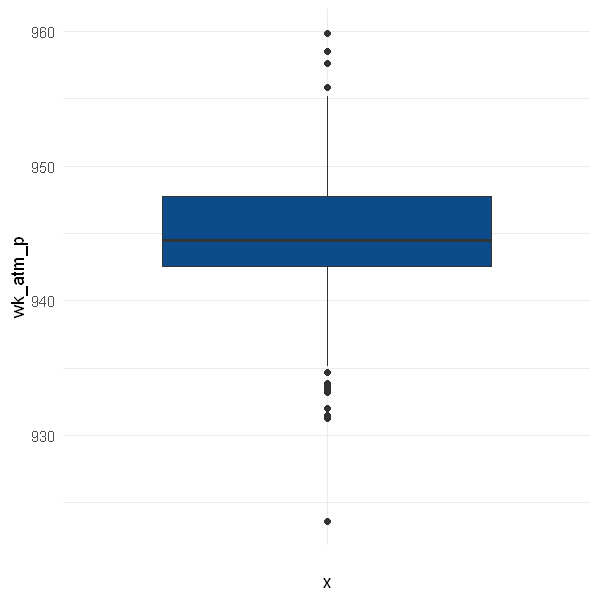

In [467]:
# The weekly athmospheric pressure:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(final_data) +
  aes(x = "", y = wk_atm_p) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

#### the outliers here are on both sides (over the max under under the min). 

In [381]:
#see the actual values
boxplot.stats(final_data$wk_atm_p)$out

[1] 933.8612 933.3757 933.6537 931.4549 933.1795 931.9777 931.2195 923.6331
 [9] 933.8603 934.6750 959.8448 957.5805 958.5283 955.8092

In [468]:
# on which row
out <- boxplot.stats(final_data$wk_atm_p)$out
out_ind <- which(final_data$wk_atm_p %in% c(out))
out_ind

[1]  52 108 109 110 116 203 211 214 220 225 236 237 239 286

`geom_smooth()` using formula 'y ~ x'



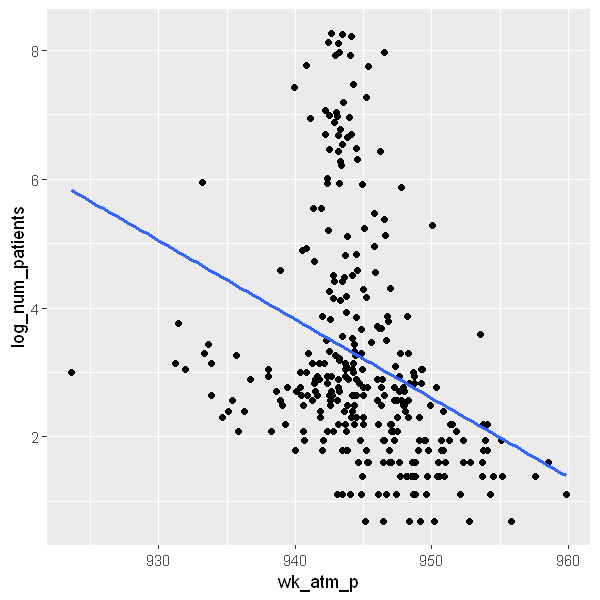

In [430]:
# with the log of the num_patients (the outcome) 

ggplot(data = final_data, aes(x = wk_atm_p, y = log_num_patients)) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)


In [ ]:
# There is one point that is realy "outside the lines" - 923.6331349
# also the ones on the right side may affect the correlation as they 'push the line down', which may be important
# (i.e. very high pressure is bad for mosquitoes?!)

In [469]:
# Check whether the outliers create a false correlation 
cor.test(final_data$log_num_patients, df_out$wk_atm_p, method = "spearman")

Warning message in cor.test.default(final_data$log_num_patients, df_out$wk_atm_p, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  final_data$log_num_patients and df_out$wk_atm_p
S = 5054360, p-value = 0.7526
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.0179744 


In [470]:
var1 <- final_data$wk_atm_p[which(df_out$wk_atm_p==0)]
var2 <- final_data$log_num_patients[which(df_out$wk_atm_p==0)]

cor.test(as.numeric(var2), var1, method = "spearman")
# This is relatively high. I can't remove this as it affects both correlation and distribution. 

Warning message in cor.test.default(as.numeric(var2), var1, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  as.numeric(var2) and var1
S = 6251413, p-value = 6.779e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.446303 


In [471]:
# carefully apply the function for the lower part (under the min) - only the one point
outlierReplace(final_data, "wk_atm_p", which(final_data$wk_atm_p < 924), 932)

In [472]:
# carefully apply the function for the upper part (over the max) 
outlierReplace(final_data, "wk_atm_p", which(final_data$wk_atm_p > 957), 955)

`geom_smooth()` using formula 'y ~ x'



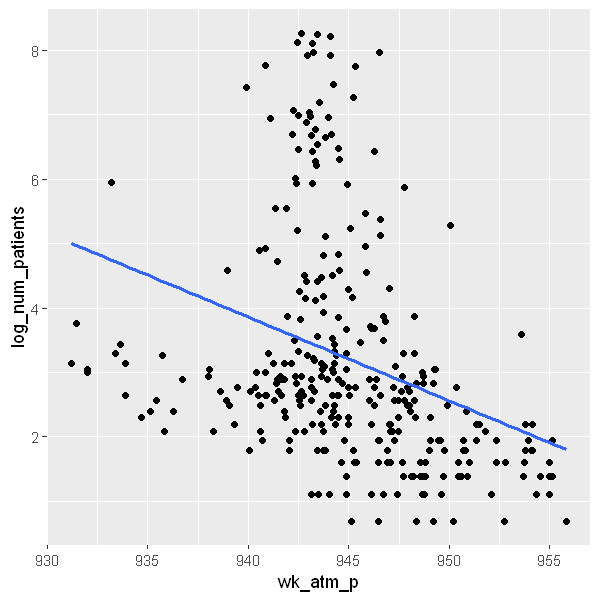

In [473]:
# plot again
ggplot(data = final_data, aes(x = wk_atm_p, y = log_num_patients)) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)

# looks better, and correlation remains. 

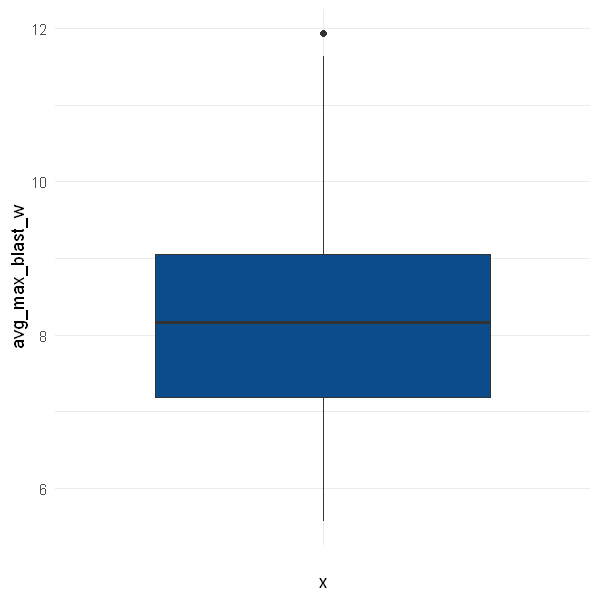

In [474]:
# avarage_max_blast_w:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(final_data) +
  aes(x = "", y = avg_max_blast_w) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

In [387]:
#see the actual value
boxplot.stats(final_data$avg_max_blast_w)$out

[1] 11.93429

In [475]:
# on which row / week
out <- boxplot.stats(final_data$avg_max_blast_w)$out
out_ind <- which(final_data$avg_max_blast_w %in% c(out))
out_ind

[1] 105

`geom_smooth()` using formula 'y ~ x'



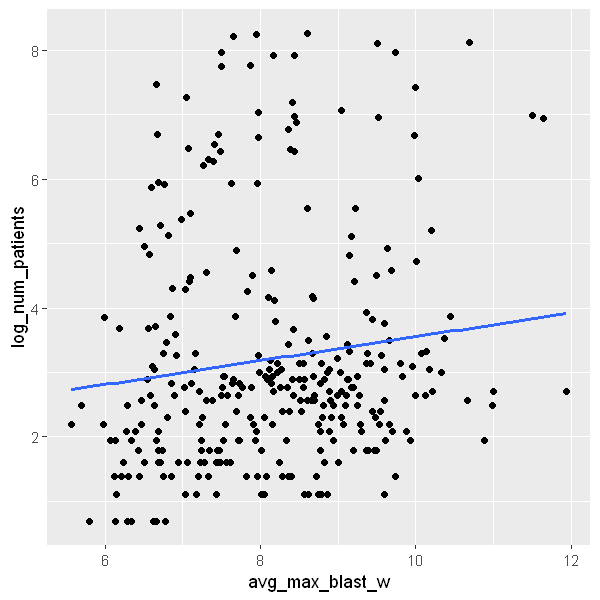

In [437]:
# with the log of the num_patients (the outcome) 

ggplot(data = final_data, aes(x =avg_max_blast_w, y = log_num_patients)) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)

# i'm reporting this, but afraid to remove, for the same reasons mentioned above.

In [438]:
# does the outlier create a false correlation?  
cor.test(final_data$log_num_patients, df_out$avg_max_blast_w, method = "spearman")
# no. 

Warning message in cor.test.default(final_data$log_num_patients, df_out$avg_max_blast_w, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  final_data$log_num_patients and df_out$avg_max_blast_w
S = 4976167, p-value = 0.9689
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.002225936 


In [476]:
# Bring it down a notch, again for the reasons mentioned above. 
# we can replace instead of NA - to keep the high value, since its only one it wont create a 'group' at the max.
outlierReplace(final_data, "avg_max_blast_w", which(final_data$avg_max_blast_w >11), 11.5)

`geom_smooth()` using formula 'y ~ x'



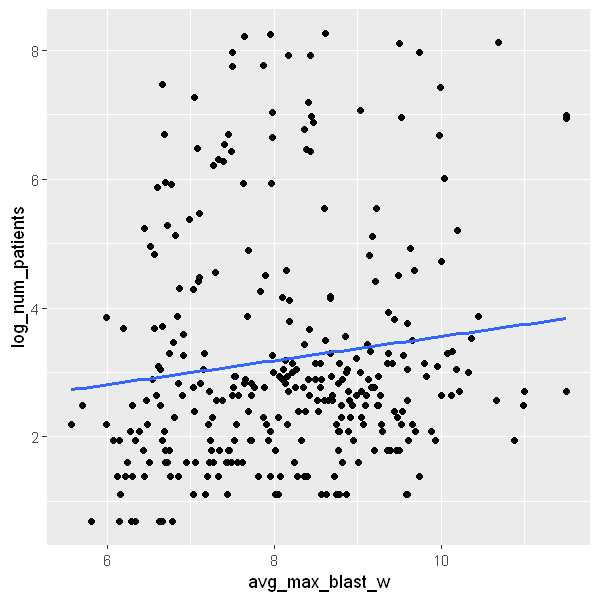

In [477]:
ggplot(data = final_data, aes(x =avg_max_blast_w, y = log_num_patients)) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)


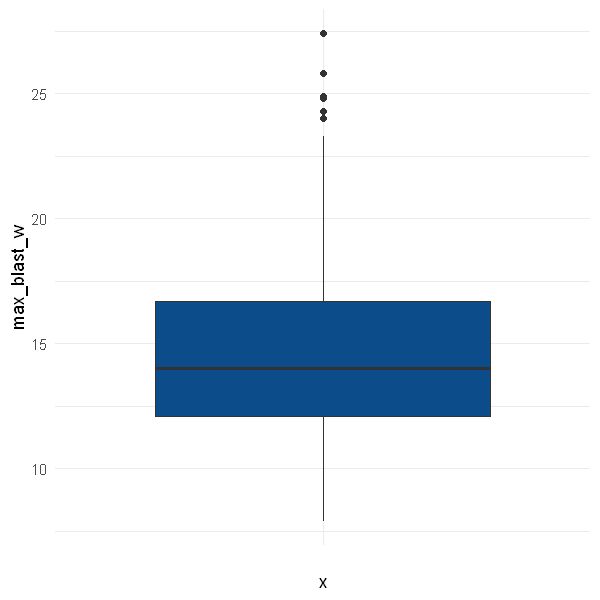

In [478]:
# max blast wind:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(final_data) +
  aes(x = "", y = max_blast_w) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

In [479]:
#see the actual values
boxplot.stats(final_data$max_blast_w)$out

[1] 24.9 24.8 24.0 24.3 27.4 25.8

`geom_smooth()` using formula 'y ~ x'



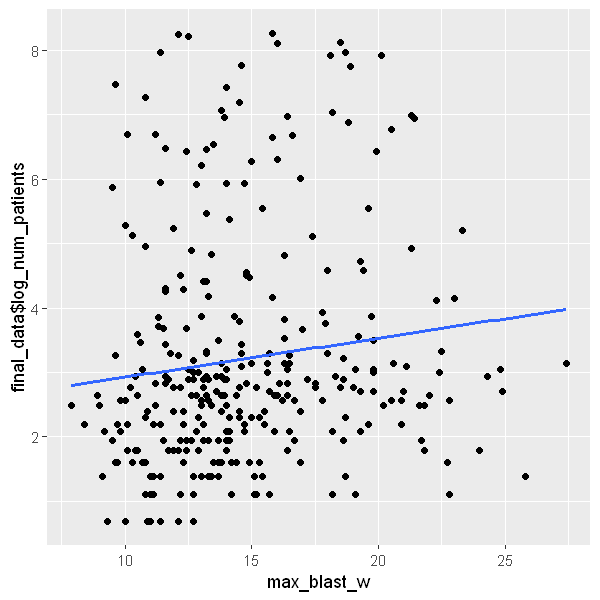

In [441]:
# with the log of the num_patients (the outcome) 

ggplot(data = final_data, aes(x =max_blast_w, y = final_data$log_num_patients)) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)


In [442]:
# do the outliers create a false correlation?  
cor.test(final_data$log_num_patients, df_out$max_blast_w, method = "spearman")

Warning message in cor.test.default(final_data$log_num_patients, df_out$max_blast_w, :
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  final_data$log_num_patients and df_out$max_blast_w
S = 5109381, p-value = 0.6103
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.02905591 


In [443]:
var1 <- final_data$max_blast_w[which(df_out$max_blast_w==0)]
var2 <- final_data$log_num_patients[which(df_out$max_blast_w==0)]

cor.test(as.numeric(var2), var1, method = "spearman")

# ehh .. small correlation?

Warning message in cor.test.default(as.numeric(var2), var1, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  as.numeric(var2) and var1
S = 3692189, p-value = 0.000204
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2114684 


In [480]:
# for max_blast_w the IQR is 16.7. I am 'afraid' because of the fact that all these points have low patient counts. 
# If we do NA, there will be a stronger correlation ..?
outlierReplace(final_data, "max_blast_w", which(final_data$max_blast_w >24), 24)

`geom_smooth()` using formula 'y ~ x'



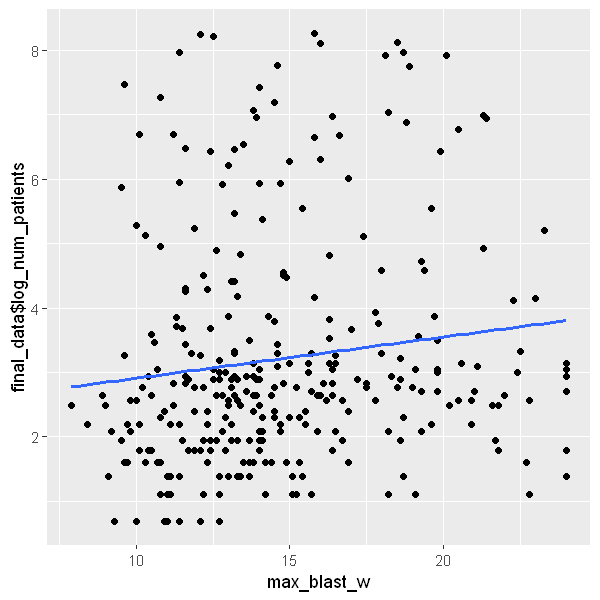

In [445]:
ggplot(data = final_data, aes(x =max_blast_w, y = final_data$log_num_patients)) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)

# could do NA as well. It looks good, so I will leave this at that. 

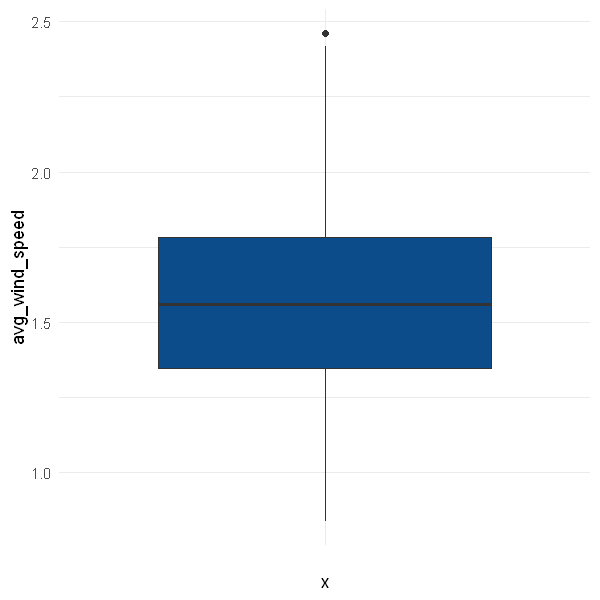

In [481]:
# The average wind speed:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(final_data) +
  aes(x = "", y = avg_wind_speed) +
  geom_boxplot(fill = "#0c4c8a") +
  theme_minimal()

`geom_smooth()` using formula 'y ~ x'



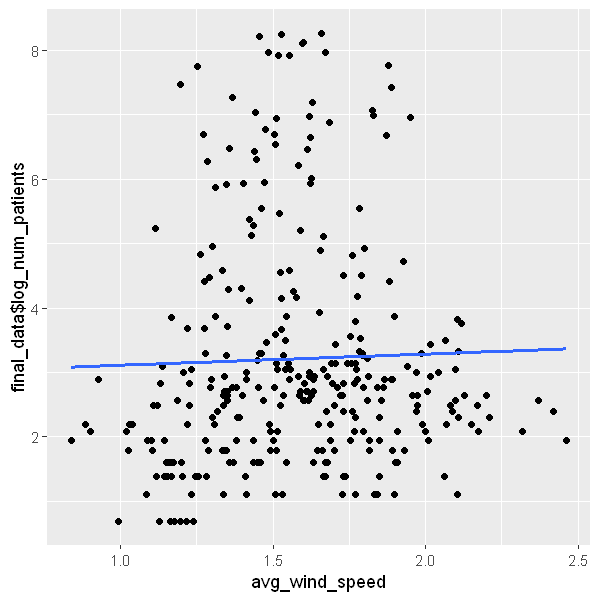

In [446]:
# with the log of the num_patients (the outcome) 

ggplot(data = final_data, aes(x =avg_wind_speed, y = final_data$log_num_patients)) + 
  geom_point(color='black') + geom_smooth(method = "lm", se = FALSE)

# wow - can see there is no correlation. 


In [397]:
#see the actual values
boxplot.stats(final_data$avg_wind_speed)$out

[1] 2.460833

In [482]:
# There are 3 more points near it, which were not considered outliers. 
# I will replace instead of NA - to keep the high value, since its only one it wont create a 'group' at the max.
outlierReplace(final_data, "avg_wind_speed", which(final_data$avg_wind_speed >2.46), 2.2)

### So far, I found a few outliers, but they all have a link to the outcome (i.e. they all are in the area of the low number of patients) and they slightly affect distribution. 
### Moreover, from the row indices of the outliers,   I see that there isn't one specific row that has more than one outlier (i.e. 'a strange week').  Thus I just modified the outliers a bit to still represent the max values, instead of just NA. 

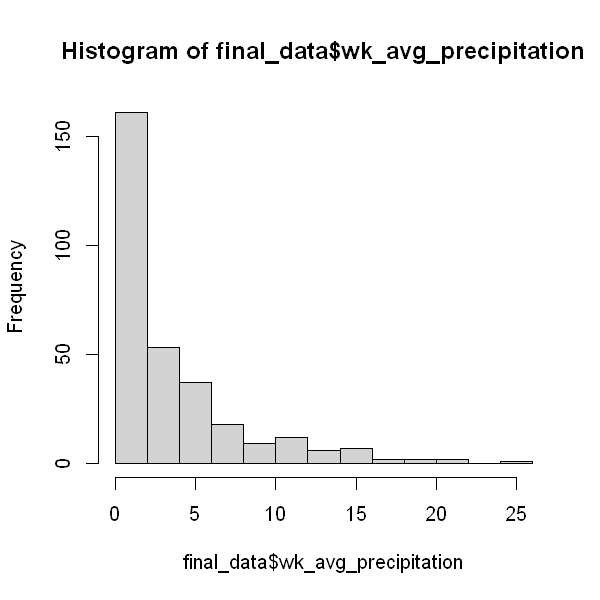

In [401]:
# This parameter was found to have different distribution
hist (final_data$wk_avg_precipitation)

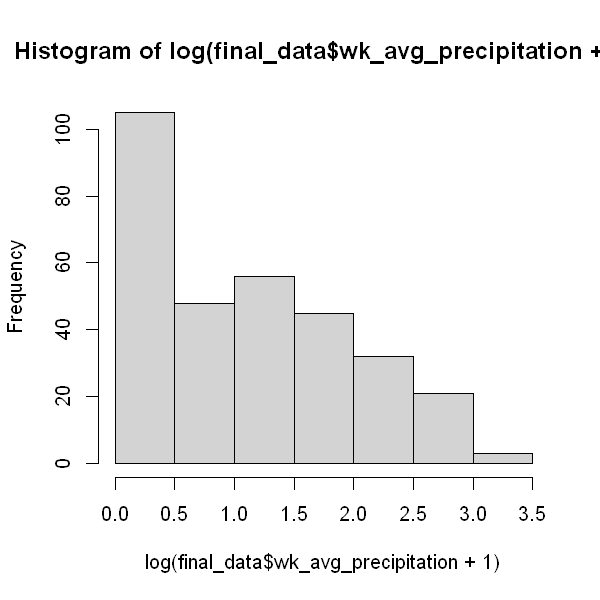

In [402]:
# check whether the num_patients is better as log
hist(log(final_data$wk_avg_precipitation+1))

# maybe should consider creating a 'dry week' parameter, where the percipitation is less than 0.5?

`geom_smooth()` using formula 'y ~ x'



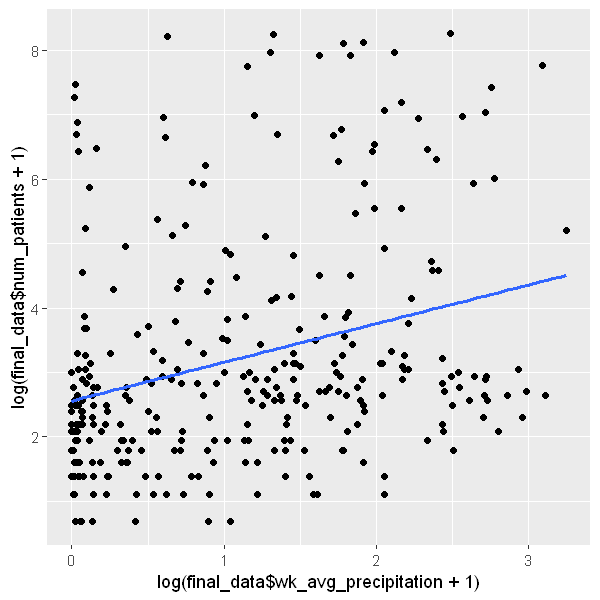

In [483]:
# with the log of the num_patients (the outcome) 

ggplot(data = final_data, aes(x =log(final_data$wk_avg_precipitation+1), y = log(final_data$num_patients+1))) + 
  geom_point(color='black')+ geom_smooth(method = "lm", se = FALSE)

# thats an ok distribution, with no clear connection between the parameters. 

In [484]:
head (final_data)

,cum_week1,wk_atm_p,wk_dew_p,wk_avg_max_tmp,wk_max_tm,wk_avg_tm,wk_min_tm,wk_avg_min_tmp,wk_avg_hum,wk_min_hum,avg_max_blast_w,max_blast_w,avg_wind_speed,wk_avg_precipitation,num_patients,male_perc,year,month,log_num_patients
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,1,943.7298,18.03250,30.78000,35.7,24.19155,15.8,19.00000,71.23571,25,8.674286,13.3,1.775595,3.222857,64,48,2013,1,4.174387
2,2,941.4388,18.37952,28.67143,36.7,22.99917,15.8,19.44286,77.61310,29,10.002857,19.3,1.926786,9.600000,112,38,2013,1,4.727388
3,3,940.8427,19.05929,28.75714,33.5,22.61821,16.8,19.40000,81.73571,41,9.631429,21.3,1.798095,6.800000,137,51,2013,2,4.927254
4,4,941.9092,18.53536,27.72571,33.7,22.11857,15.8,18.64286,81.43690,45,9.225714,15.4,1.783333,6.314286,254,43,2013,2,5.541264
5,5,943.2068,19.78702,26.15143,32.8,21.84917,16.3,19.73714,88.72024,49,7.625714,14.7,1.404048,12.982857,375,42,2013,2,5.929589
6,6,942.4817,18.84524,28.51714,35.5,22.67262,16.6,18.94857,80.74881,35,8.388571,13.2,1.613333,9.354286,641,42,2013,2,6.464588


In [485]:
# writing csv to move to the next notebook.
write.csv(final_data, "final_data_dengue.csv", row.names = F)